<a href="https://colab.research.google.com/github/FinNijatTech/ML-algorithms-as-EWM-for-Economic-Crisis/blob/main/Master_Thesis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm

In [49]:
df = pd.read_excel("/content/Master_Thesis_Data Experiment Data Cutting without crisis (No IR).xlsx")
df.drop(columns = 'International Investment', inplace=True)
df

,Country,Date,Dependent Variable,Credit to GDP,Housing price,GDP growth,Inflation,3 month money market rate,Gross fixed capital formation to GDP,Account to GDP,10 Year Government Bond Rate,Unemployment,Share Price
0,DE,1970-Q1,0,NaN,31.535927,-1.595662,2.894135,9.536667,-1.991301,NaN,7.833333,NaN,10.873150
1,DE,1970-Q2,0,NaN,32.363393,3.975818,3.335860,9.890000,8.214446,NaN,8.400000,NaN,9.807037
2,DE,1970-Q3,0,NaN,33.204478,1.867836,3.566009,9.370000,5.363654,NaN,8.533334,NaN,9.271091
3,DE,1970-Q4,0,85.6,34.062502,0.847607,4.000000,8.830000,-0.028774,NaN,8.500000,NaN,8.835394
4,DE,1971-Q1,0,85.8,34.907015,-1.921103,4.441154,7.476666,-1.492452,NaN,7.766667,NaN,9.699077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,CA,2018-Q4,0,216.2,129.660633,0.340870,2.035623,2.112573,-1.296769,-2.919957,2.318050,5.700000,104.797200
2596,CA,2019-Q1,0,217.0,129.556938,0.070759,1.611685,1.997995,1.606348,-3.080937,1.857795,5.800000,109.103100
2597,CA,2019-Q2,0,219.3,128.061840,0.988110,2.148389,1.859268,0.004727,-1.128215,1.616548,5.566667,114.186500
2598,CA,2019-Q3,0,221.0,129.734163,0.374027,1.939334,1.837570,2.206205,-2.178369,1.362776,5.733333,114.896600


In [50]:
# MB: I would only fill in NA values where there are missing in-between data
#df.ffill(inplace=True) # filling NA values
#df.bfill(inplace=True) # filling NA values
#df
#df.replace(np.nan, 0, inplace=True)

#df.fillna(0, inplace=True)


In [51]:
df

,Country,Date,Dependent Variable,Credit to GDP,Housing price,GDP growth,Inflation,3 month money market rate,Gross fixed capital formation to GDP,Account to GDP,10 Year Government Bond Rate,Unemployment,Share Price
0,DE,1970-Q1,0,NaN,31.535927,-1.595662,2.894135,9.536667,-1.991301,NaN,7.833333,NaN,10.873150
1,DE,1970-Q2,0,NaN,32.363393,3.975818,3.335860,9.890000,8.214446,NaN,8.400000,NaN,9.807037
2,DE,1970-Q3,0,NaN,33.204478,1.867836,3.566009,9.370000,5.363654,NaN,8.533334,NaN,9.271091
3,DE,1970-Q4,0,85.6,34.062502,0.847607,4.000000,8.830000,-0.028774,NaN,8.500000,NaN,8.835394
4,DE,1971-Q1,0,85.8,34.907015,-1.921103,4.441154,7.476666,-1.492452,NaN,7.766667,NaN,9.699077
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,CA,2018-Q4,0,216.2,129.660633,0.340870,2.035623,2.112573,-1.296769,-2.919957,2.318050,5.700000,104.797200
2596,CA,2019-Q1,0,217.0,129.556938,0.070759,1.611685,1.997995,1.606348,-3.080937,1.857795,5.800000,109.103100
2597,CA,2019-Q2,0,219.3,128.061840,0.988110,2.148389,1.859268,0.004727,-1.128215,1.616548,5.566667,114.186500
2598,CA,2019-Q3,0,221.0,129.734163,0.374027,1.939334,1.837570,2.206205,-2.178369,1.362776,5.733333,114.896600


In [52]:
df['Share Price Growth'] = df['Share Price'].pct_change() * 100
df['Housing Price Growth'] = df['Housing price'].pct_change() * 100
df = df.drop(columns = ['Share Price', 'Housing price'])

In [53]:
# Consider some limited interactions, like high credit to GDP and high interest rates

df['C-GDP/3MMR_dummy'] = ((df['Credit to GDP'] > df['Credit to GDP'].mean()) & (df['3 month money market rate'] > df['3 month money market rate'].mean()))
df['C-GDP/3MMR_dummy'] = df['C-GDP/3MMR_dummy'].astype(int)

df['GDP/UER_dummy'] = ((df['GDP growth'] < 0) & (df['Unemployment'] > df['Unemployment'].mean())).astype(int)

df['INF/10YGB_dummy'] = ((df['Inflation'] > df['Inflation'].mean()) & (df['10 Year Government Bond Rate'] > df['10 Year Government Bond Rate'].mean())).astype(int)

df['GDP/SP_dummy'] = (df['GDP growth'] < df['GDP growth'].mean()) & (df['Share Price Growth'] < df['Share Price Growth'].mean())
df['GDP/SP_dummy'] = df['GDP/SP_dummy'].astype(int)

df['C-GDP/UER_dummy'] = (df['Credit to GDP'] > df['Credit to GDP'].mean()) & (df['Unemployment'] > df['Unemployment'].mean())
df['C-GDP/UER_dummy'] = df['C-GDP/UER_dummy'].astype(int)



print(sum(df['C-GDP/3MMR_dummy']))
print(sum(df['GDP/UER_dummy']))
print(sum(df['INF/10YGB_dummy']))
print(sum(df['GDP/SP_dummy']))
print(sum(df['C-GDP/UER_dummy']))


print(sum(df['Dependent Variable']))


159
217
418
679
426
225


In [54]:
df

,Country,Date,Dependent Variable,Credit to GDP,GDP growth,Inflation,3 month money market rate,Gross fixed capital formation to GDP,Account to GDP,10 Year Government Bond Rate,Unemployment,Share Price Growth,Housing Price Growth,C-GDP/3MMR_dummy,GDP/UER_dummy,INF/10YGB_dummy,GDP/SP_dummy,C-GDP/UER_dummy
0,DE,1970-Q1,0,NaN,-1.595662,2.894135,9.536667,-1.991301,NaN,7.833333,NaN,NaN,NaN,0,0,0,0,0
1,DE,1970-Q2,0,NaN,3.975818,3.335860,9.890000,8.214446,NaN,8.400000,NaN,-9.805006,2.623882,0,0,0,0,0
2,DE,1970-Q3,0,NaN,1.867836,3.566009,9.370000,5.363654,NaN,8.533334,NaN,-5.464913,2.598879,0,0,0,0,0
3,DE,1970-Q4,0,85.6,0.847607,4.000000,8.830000,-0.028774,NaN,8.500000,NaN,-4.699522,2.584060,0,0,0,0,0
4,DE,1971-Q1,0,85.8,-1.921103,4.441154,7.476666,-1.492452,NaN,7.766667,NaN,9.775263,2.479305,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,CA,2018-Q4,0,216.2,0.340870,2.035623,2.112573,-1.296769,-2.919957,2.318050,5.700000,-7.799183,0.797327,0,0,0,1,0
2596,CA,2019-Q1,0,217.0,0.070759,1.611685,1.997995,1.606348,-3.080937,1.857795,5.800000,4.108793,-0.079974,0,0,0,0,0
2597,CA,2019-Q2,0,219.3,0.988110,2.148389,1.859268,0.004727,-1.128215,1.616548,5.566667,4.659263,-1.154008,0,0,0,0,0
2598,CA,2019-Q3,0,221.0,0.374027,1.939334,1.837570,2.206205,-2.178369,1.362776,5.733333,0.621877,1.305871,0,0,0,1,0


## **Below part takes all countries that we have in df and apply HP filter to Credit to GDP.**

In [189]:
# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm



countries = df['Country']

example = df[(df['Country']=='DE')]
start_index = example['Credit to GDP'].notna().idxmax()
result = example.loc[start_index:]
variable = example['Credit to GDP'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)


cred_t_1s_DE_Cr_GDP = np.zeros(len(cred_t))
cred_c_1s_DE_Cr_GDP = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_DE_Cr_GDP[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
	temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
	cred_t_1s_DE_Cr_GDP[i] = np.exp(temp.iloc[-1]/100)
	cred_c_1s_DE_Cr_GDP[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_DE)
# plt.show()


# plt.plot(variable.index, cred_c_1s_DE)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['Credit to GDP'].iloc[:2]))


# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm



countries = df['Country']

example = df[(df['Country']=='DK')]
start_index = example['Credit to GDP'].notna().idxmax()
result = example.loc[start_index:]
variable = example['Credit to GDP'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)


cred_t_1s_DK_Cr_GDP = np.zeros(len(cred_t))
cred_c_1s_DK_Cr_GDP = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_DK_Cr_GDP[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
	temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
	cred_t_1s_DK_Cr_GDP[i] = np.exp(temp.iloc[-1]/100)
	cred_c_1s_DK_Cr_GDP[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_DK)
# plt.show()


# plt.plot(variable.index, cred_c_1s_DK)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['Credit to GDP'].iloc[:2]))


# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm



countries = df['Country']

example = df[(df['Country']=='FI')]
start_index = example['Credit to GDP'].notna().idxmax()
result = example.loc[start_index:]
variable = example['Credit to GDP'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)


cred_t_1s_FI_Cr_GDP = np.zeros(len(cred_t))
cred_c_1s_FI_Cr_GDP = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_FI_Cr_GDP[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
	temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
	cred_t_1s_FI_Cr_GDP[i] = np.exp(temp.iloc[-1]/100)
	cred_c_1s_FI_Cr_GDP[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_FI)
# plt.show()


# plt.plot(variable.index, cred_c_1s_FI)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['Credit to GDP'].iloc[:2]))


# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm



countries = df['Country']

example = df[(df['Country']=='FR')]
start_index = example['Credit to GDP'].notna().idxmax()
result = example.loc[start_index:]
variable = example['Credit to GDP'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)


cred_t_1s_FR_Cr_GDP = np.zeros(len(cred_t))
cred_c_1s_FR_Cr_GDP = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_FR_Cr_GDP[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
	temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
	cred_t_1s_FR_Cr_GDP[i] = np.exp(temp.iloc[-1]/100)
	cred_c_1s_FR_Cr_GDP[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_FR)
# plt.show()


# plt.plot(variable.index, cred_c_1s_FR)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['Credit to GDP'].iloc[:2]))



# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm



countries = df['Country']

example = df[(df['Country']=='GB')]
start_index = example['Credit to GDP'].notna().idxmax()
result = example.loc[start_index:]
variable = example['Credit to GDP'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)


cred_t_1s_GB_Cr_GDP = np.zeros(len(cred_t))
cred_c_1s_GB_Cr_GDP = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_GB_Cr_GDP[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
	temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
	cred_t_1s_GB_Cr_GDP[i] = np.exp(temp.iloc[-1]/100)
	cred_c_1s_GB_Cr_GDP[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_GB)
# plt.show()


# plt.plot(variable.index, cred_c_1s_GB)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['Credit to GDP'].iloc[:2]))


# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm



countries = df['Country']

example = df[(df['Country']=='IT')]
start_index = example['Credit to GDP'].notna().idxmax()
result = example.loc[start_index:]
variable = example['Credit to GDP'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)


cred_t_1s_IT_Cr_GDP = np.zeros(len(cred_t))
cred_c_1s_IT_Cr_GDP = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_IT_Cr_GDP[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
	temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
	cred_t_1s_IT_Cr_GDP[i] = np.exp(temp.iloc[-1]/100)
	cred_c_1s_IT_Cr_GDP[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_IT)
# plt.show()


# plt.plot(variable.index, cred_c_1s_IT)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['Credit to GDP'].iloc[:2]))



# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm



countries = df['Country']

example = df[(df['Country']=='JP')]
start_index = example['Credit to GDP'].notna().idxmax()
result = example.loc[start_index:]
variable = example['Credit to GDP'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)


cred_t_1s_JP_Cr_GDP = np.zeros(len(cred_t))
cred_c_1s_JP_Cr_GDP = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_JP_Cr_GDP[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
	temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
	cred_t_1s_JP_Cr_GDP[i] = np.exp(temp.iloc[-1]/100)
	cred_c_1s_JP_Cr_GDP[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_JP)
# plt.show()


# plt.plot(variable.index, cred_c_1s_JP)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['Credit to GDP'].iloc[:2]))


# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm



countries = df['Country']

example = df[(df['Country']=='NL')]
start_index = example['Credit to GDP'].notna().idxmax()
result = example.loc[start_index:]
variable = example['Credit to GDP'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)


cred_t_1s_NL_Cr_GDP = np.zeros(len(cred_t))
cred_c_1s_NL_Cr_GDP = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_NL_Cr_GDP[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
	temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
	cred_t_1s_NL_Cr_GDP[i] = np.exp(temp.iloc[-1]/100)
	cred_c_1s_NL_Cr_GDP[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_NL)
# plt.show()


# plt.plot(variable.index, cred_c_1s_NL)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['Credit to GDP'].iloc[:2]))



# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm



countries = df['Country']

example = df[(df['Country']=='NO')]
start_index = example['Credit to GDP'].notna().idxmax()
result = example.loc[start_index:]
variable = example['Credit to GDP'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)


cred_t_1s_NO_Cr_GDP = np.zeros(len(cred_t))
cred_c_1s_NO_Cr_GDP = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_NO_Cr_GDP[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
	temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
	cred_t_1s_NO_Cr_GDP[i] = np.exp(temp.iloc[-1]/100)
	cred_c_1s_NO_Cr_GDP[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_NO)
# plt.show()


# plt.plot(variable.index, cred_c_1s_NO)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['Credit to GDP'].iloc[:2]))



# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm



countries = df['Country']

example = df[(df['Country']=='PT')]
start_index = example['Credit to GDP'].notna().idxmax()
result = example.loc[start_index:]
variable = example['Credit to GDP'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)


cred_t_1s_PT_Cr_GDP = np.zeros(len(cred_t))
cred_c_1s_PT_Cr_GDP = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_PT_Cr_GDP[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
	temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
	cred_t_1s_PT_Cr_GDP[i] = np.exp(temp.iloc[-1]/100)
	cred_c_1s_PT_Cr_GDP[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_PT)
# plt.show()


# plt.plot(variable.index, cred_c_1s_PT)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['Credit to GDP'].iloc[:2]))


# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm



countries = df['Country']

example = df[(df['Country']=='SE')]
start_index = example['Credit to GDP'].notna().idxmax()
result = example.loc[start_index:]
variable = example['Credit to GDP'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)


cred_t_1s_SE_Cr_GDP = np.zeros(len(cred_t))
cred_c_1s_SE_Cr_GDP = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_SE_Cr_GDP[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
	temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
	cred_t_1s_SE_Cr_GDP[i] = np.exp(temp.iloc[-1]/100)
	cred_c_1s_SE_Cr_GDP[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_SE)
# plt.show()


# plt.plot(variable.index, cred_c_1s_SE)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['Credit to GDP'].iloc[:2]))




# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm



countries = df['Country']

example = df[(df['Country']=='US')]
start_index = example['Credit to GDP'].notna().idxmax()
result = example.loc[start_index:]
variable = example['Credit to GDP'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)


cred_t_1s_US_Cr_GDP = np.zeros(len(cred_t))
cred_c_1s_US_Cr_GDP = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_US_Cr_GDP[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
	temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
	cred_t_1s_US_Cr_GDP[i] = np.exp(temp.iloc[-1]/100)
	cred_c_1s_US_Cr_GDP[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_US)
# plt.show()


# plt.plot(variable.index, cred_c_1s_US)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['Credit to GDP'].iloc[:2]))



# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm



countries = df['Country']

example = df[(df['Country']=='CA')]
start_index = example['Credit to GDP'].notna().idxmax()
result = example.loc[start_index:]
variable = example['Credit to GDP'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)


cred_t_1s_CA_Cr_GDP = np.zeros(len(cred_t))
cred_c_1s_CA_Cr_GDP = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_CA_Cr_GDP[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
	temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
	cred_t_1s_CA_Cr_GDP[i] = np.exp(temp.iloc[-1]/100)
	cred_c_1s_CA_Cr_GDP[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_CA)
# plt.show()


# plt.plot(variable.index, cred_c_1s_CA)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['Credit to GDP'].iloc[:2]))



In [ ]:
## **Below part takes all countries that we have in df and apply HP filter to Credit to GDP.**

## **Below part takes all countries that we have in df and apply HP filter to GDP Growth but we get unexpected error.**

In [195]:
# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm


countries = df['Country']

example = df[(df['Country']=='DE')]
start_index = example['GDP growth'].notna().idxmax()
result = example.loc[start_index:]
variable = example['GDP growth'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)

cred_t_1s_DE_GDP_gr = np.zeros(len(cred_t))
cred_c_1s_DE_GDP_gr = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_DE_GDP_gr[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
  temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
  cred_t_1s_DE_GDP_gr[i] = np.exp(temp.iloc[-1]/100)
  cred_c_1s_DE_GDP_gr[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_DE)
# plt.show()

# plt.plot(variable.index, cred_c_1s_DE)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['GDP growth'].iloc[:2]))

# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm


countries = df['Country']

example = df[(df['Country']=='DK')]
start_index = example['GDP growth'].notna().idxmax()
result = example.loc[start_index:]
variable = example['GDP growth'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)

cred_t_1s_DK_GDP_gr = np.zeros(len(cred_t))
cred_c_1s_DK_GDP_gr = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_DK_GDP_gr[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
  temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
  cred_t_1s_DK_GDP_gr[i] = np.exp(temp.iloc[-1]/100)
  cred_c_1s_DK_GDP_gr[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_DK)
# plt.show()

# plt.plot(variable.index, cred_c_1s_DK)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['GDP growth'].iloc[:2]))

# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm


countries = df['Country']

example = df[(df['Country']=='FI')]
start_index = example['GDP growth'].notna().idxmax()
result = example.loc[start_index:]
variable = example['GDP growth'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)

cred_t_1s_FI_GDP_gr = np.zeros(len(cred_t))
cred_c_1s_FI_GDP_gr = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_FI_GDP_gr[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
  temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
  cred_t_1s_FI_GDP_gr[i] = np.exp(temp.iloc[-1]/100)
  cred_c_1s_FI_GDP_gr[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_FI)
# plt.show()

# plt.plot(variable.index, cred_c_1s_FI)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['GDP growth'].iloc[:2]))

# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm


countries = df['Country']

example = df[(df['Country']=='FR')]
start_index = example['GDP growth'].notna().idxmax()
result = example.loc[start_index:]
variable = example['GDP growth'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)

cred_t_1s_FR_GDP_gr = np.zeros(len(cred_t))
cred_c_1s_FR_GDP_gr = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_FR_GDP_gr[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
  temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
  cred_t_1s_FR_GDP_gr[i] = np.exp(temp.iloc[-1]/100)
  cred_c_1s_FR_GDP_gr[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_FR)
# plt.show()

# plt.plot(variable.index, cred_c_1s_FR)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['GDP growth'].iloc[:2]))


# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm


countries = df['Country']

example = df[(df['Country']=='GB')]
start_index = example['GDP growth'].notna().idxmax()
result = example.loc[start_index:]
variable = example['GDP growth'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)

cred_t_1s_GB_GDP_gr = np.zeros(len(cred_t))
cred_c_1s_GB_GDP_gr = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_GB_GDP_gr[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
  temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
  cred_t_1s_GB_GDP_gr[i] = np.exp(temp.iloc[-1]/100)
  cred_c_1s_GB_GDP_gr[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_GB)
# plt.show()

# plt.plot(variable.index, cred_c_1s_GB)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['GDP growth'].iloc[:2]))

# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm


countries = df['Country']

example = df[(df['Country']=='IT')]
start_index = example['GDP growth'].notna().idxmax()
result = example.loc[start_index:]
variable = example['GDP growth'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)

cred_t_1s_IT_GDP_gr = np.zeros(len(cred_t))
cred_c_1s_IT_GDP_gr = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_IT_GDP_gr[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
  temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
  cred_t_1s_IT_GDP_gr[i] = np.exp(temp.iloc[-1]/100)
  cred_c_1s_IT_GDP_gr[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_IT)
# plt.show()

# plt.plot(variable.index, cred_c_1s_IT)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['GDP growth'].iloc[:2]))


# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm


countries = df['Country']

example = df[(df['Country']=='JP')]
start_index = example['GDP growth'].notna().idxmax()
result = example.loc[start_index:]
variable = example['GDP growth'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)

cred_t_1s_JP_GDP_gr = np.zeros(len(cred_t))
cred_c_1s_JP_GDP_gr = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_JP_GDP_gr[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
  temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
  cred_t_1s_JP_GDP_gr[i] = np.exp(temp.iloc[-1]/100)
  cred_c_1s_JP_GDP_gr[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_JP)
# plt.show()

# plt.plot(variable.index, cred_c_1s_JP)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['GDP growth'].iloc[:2]))

# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm


countries = df['Country']

example = df[(df['Country']=='NL')]
start_index = example['GDP growth'].notna().idxmax()
result = example.loc[start_index:]
variable = example['GDP growth'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)

cred_t_1s_NL_GDP_gr = np.zeros(len(cred_t))
cred_c_1s_NL_GDP_gr = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_NL_GDP_gr[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
  temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
  cred_t_1s_NL_GDP_gr[i] = np.exp(temp.iloc[-1]/100)
  cred_c_1s_NL_GDP_gr[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_NL)
# plt.show()

# plt.plot(variable.index, cred_c_1s_NL)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['GDP growth'].iloc[:2]))


# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm


countries = df['Country']

example = df[(df['Country']=='NO')]
start_index = example['GDP growth'].notna().idxmax()
result = example.loc[start_index:]
variable = example['GDP growth'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)

cred_t_1s_NO_GDP_gr = np.zeros(len(cred_t))
cred_c_1s_NO_GDP_gr = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_NO_GDP_gr[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
  temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
  cred_t_1s_NO_GDP_gr[i] = np.exp(temp.iloc[-1]/100)
  cred_c_1s_NO_GDP_gr[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_NO)
# plt.show()

# plt.plot(variable.index, cred_c_1s_NO)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['GDP growth'].iloc[:2]))


# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm


countries = df['Country']

example = df[(df['Country']=='PT')]
start_index = example['GDP growth'].notna().idxmax()
result = example.loc[start_index:]
variable = example['GDP growth'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)

cred_t_1s_PT_GDP_gr = np.zeros(len(cred_t))
cred_c_1s_PT_GDP_gr = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_PT_GDP_gr[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
  temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
  cred_t_1s_PT_GDP_gr[i] = np.exp(temp.iloc[-1]/100)
  cred_c_1s_PT_GDP_gr[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_PT)
# plt.show()

# plt.plot(variable.index, cred_c_1s_PT)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['GDP growth'].iloc[:2]))

# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm


countries = df['Country']

example = df[(df['Country']=='SE')]
start_index = example['GDP growth'].notna().idxmax()
result = example.loc[start_index:]
variable = example['GDP growth'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)

cred_t_1s_SE_GDP_gr = np.zeros(len(cred_t))
cred_c_1s_SE_GDP_gr = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_SE_GDP_gr[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
  temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
  cred_t_1s_SE_GDP_gr[i] = np.exp(temp.iloc[-1]/100)
  cred_c_1s_SE_GDP_gr[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_SE)
# plt.show()

# plt.plot(variable.index, cred_c_1s_SE)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['GDP growth'].iloc[:2]))



# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm


countries = df['Country']

example = df[(df['Country']=='US')]
start_index = example['GDP growth'].notna().idxmax()
result = example.loc[start_index:]
variable = example['GDP growth'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)

cred_t_1s_US_GDP_gr = np.zeros(len(cred_t))
cred_c_1s_US_GDP_gr = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_US_GDP_gr[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
  temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
  cred_t_1s_US_GDP_gr[i] = np.exp(temp.iloc[-1]/100)
  cred_c_1s_US_GDP_gr[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_US)
# plt.show()

# plt.plot(variable.index, cred_c_1s_US)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['GDP growth'].iloc[:2]))


# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm


countries = df['Country']

example = df[(df['Country']=='CA')]
start_index = example['GDP growth'].notna().idxmax()
result = example.loc[start_index:]
variable = example['GDP growth'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)

cred_t_1s_CA_GDP_gr = np.zeros(len(cred_t))
cred_c_1s_CA_GDP_gr = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_CA_GDP_gr[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
  temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
  cred_t_1s_CA_GDP_gr[i] = np.exp(temp.iloc[-1]/100)
  cred_c_1s_CA_GDP_gr[i] = temp_c.iloc[-1]

# fig, ax = plt.subplots()
# variable.plot(ax=ax)
# # cred_t.plot(ax=ax)
# ax.plot(variable.index, cred_t_1s_CA)
# plt.show()

# plt.plot(variable.index, cred_c_1s_CA)
# plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['GDP growth'].iloc[:2]))




/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


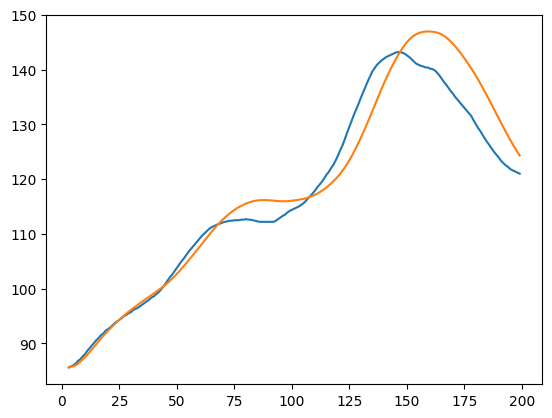

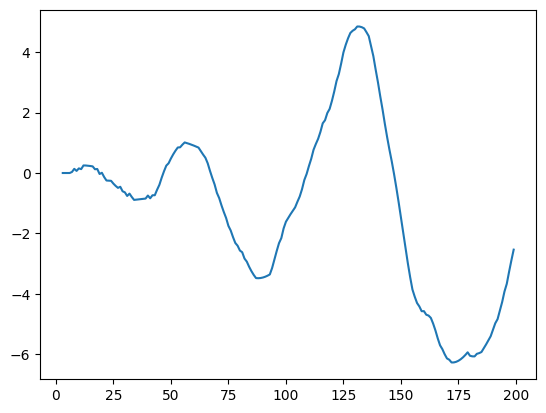

In [55]:
# Some variables should be treated in levels (like interest rates, or e.g. net foreign asset position)
# Others in dynamics (annual or quarterly), like GDP
# Yet others in deviations from trends, see below
import statsmodels as sm



countries = df['Country']

example = df[(df['Country']=='DE')]
start_index = example['Credit to GDP'].notna().idxmax()
result = example.loc[start_index:]
variable = example['Credit to GDP'].dropna()
# example

cred_c, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=100_000)


cred_t_1s_DE = np.zeros(len(cred_t))
cred_c_1s_DE = np.zeros(len(cred_t))

# variable1.iloc[:20]

cred_t_1s_DE[0:2] = variable.iloc[0:2]

for i in range(2, len(cred_t)):
	temp_c, temp = sm.tsa.filters.hp_filter.hpfilter((100*np.log(variable.iloc[:i])), lamb=100_000)
	cred_t_1s_DE[i] = np.exp(temp.iloc[-1]/100)
	cred_c_1s_DE[i] = temp_c.iloc[-1]

fig, ax = plt.subplots()
variable.plot(ax=ax)
# cred_t.plot(ax=ax)
ax.plot(variable.index, cred_t_1s_DE)
plt.show()


plt.plot(variable.index, cred_c_1s_DE)
plt.show()

# # temp

# cred_t_1s

# sm.tsa.filters.hp_filter.hpfilter((example['Credit to GDP'].iloc[:2]))

In [68]:
df['Country'].unique()

array(['DE', 'DK', 'FI', 'FR', 'GB', 'IT', 'JP', 'NL', 'NO', 'PT', 'SE',
       'US', 'CA'], dtype=object)

## **Below commented codes are doing same thing, applying HP filted to variables for all countries by creating function (def apply_hp_filter(country_df, variable_name, lamb=100_000)), but was not working properly.**

In [69]:
# import numpy as np
# import pandas as pd
# import statsmodels as sm
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame with country-wise data

# def apply_hp_filter(country_df, variable_name, lamb=100_000):
#     start_index = country_df[variable_name].notna().idxmax()
#     result = country_df.loc[start_index:]
#     variable = result[variable_name].dropna()

#     _, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=lamb)

#     cred_t_1s = np.zeros(len(cred_t))
#     cred_t_1s[0:2] = variable.iloc[0:2]

#     for i in range(2, len(cred_t)):
#         _, temp = sm.tsa.filters.hp_filter.hpfilter((100 * np.log(variable.iloc[:i])), lamb=lamb)
#         cred_t_1s[i] = np.exp(temp.iloc[-1] / 100)

#     return pd.Series(cred_t_1s, index=variable.index, name=f'{variable_name}_trend')

# # Add a new column 'Credit to GDP_trend' to store the trend values
# df['Credit to GDP_trend'] = np.nan

# # Apply the function to each country and add the results to the new column
# for country in df['Country'].unique():
#     country_df = df[df['Country'] == country]
#     result_series = apply_hp_filter(country_df, 'Credit to GDP')  # Change 'Credit to GDP' to your variable name
#     df.loc[df['Country'] == country, 'Credit to GDP_trend'] = result_series



# import numpy as np
# import pandas as pd
# import statsmodels as sm
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame with country-wise data

# def apply_hp_filter(country_df, variable_name, lamb=100_000):
#     start_index = country_df[variable_name].notna().idxmax()
#     result = country_df.loc[start_index:]
#     variable = result[variable_name].dropna()

#     cred_c, _ = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=lamb)

#     cred_c_1s = np.zeros(len(cred_c))
#     cred_c_1s[0:2] = variable.iloc[0:2]

#     for i in range(2, len(cred_c)):
#         temp_c, _ = sm.tsa.filters.hp_filter.hpfilter((100 * np.log(variable.iloc[:i])), lamb=lamb)
#         cred_c_1s[i] = temp_c.iloc[-1]

#     return pd.Series(cred_c_1s, index=variable.index, name=f'{variable_name}_cycle')

# # Add a new column 'Credit to GDP_cycle' to store the cyclical values
# df['Credit to GDP_cycle'] = np.nan

# # Apply the function to each country and add the results to the new column
# for country in df['Country'].unique():
#     country_df = df[df['Country'] == country]
#     result_series = apply_hp_filter(country_df, 'Credit to GDP')  # Change 'Credit to GDP' to your variable name
#     #df.loc[df['Country'] == country, 'Credit to GDP_cycle'] = result_series

In [72]:
# import numpy as np
# import pandas as pd
# import statsmodels as sm
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame with country-wise data

# def apply_hp_filter(country_df, variable_name, lamb=100_000):
#     start_index = country_df[variable_name].notna().idxmax()
#     result = country_df.loc[start_index:]
#     variable = result[variable_name].dropna()

#     cred_c, _ = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=lamb)

#     cred_c_1s = np.zeros(len(cred_c))
#     cred_c_1s[0:2] = variable.iloc[0:2]

#     for i in range(2, len(cred_c)):
#         temp_c, _ = sm.tsa.filters.hp_filter.hpfilter((100 * np.log(variable.iloc[:i])), lamb=lamb)
#         cred_c_1s[i] = temp_c.iloc[-1]

#     return pd.Series(cred_c_1s, index=variable.index, name=f'{variable_name}_cycle')

# # Add a new column 'Credit to GDP_cycle' to store the cyclical values
# df['GDP growth_cycle'] = np.nan

# # Apply the function to each country and add the results to the new column
# for country in df['Country'].unique():
#     country_df = df[df['Country'] == country]
#     result_series = apply_hp_filter(country_df, 'GDP growth')  # Change 'Credit to GDP' to your variable name
#     df.loc[df['Country'] == country, 'GDP growth_cycle'] = result_series


# import numpy as np
# import pandas as pd
# import statsmodels as sm
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame with country-wise data

# def apply_hp_filter(country_df, variable_name, lamb=100_000):
#     start_index = country_df[variable_name].notna().idxmax()
#     result = country_df.loc[start_index:]
#     variable = result[variable_name].dropna()

#     _, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=lamb)

#     cred_t_1s = np.zeros(len(cred_t))
#     cred_t_1s[0:2] = variable.iloc[0:2]

#     for i in range(2, len(cred_t)):
#         _, temp = sm.tsa.filters.hp_filter.hpfilter((100 * np.log(variable.iloc[:i])), lamb=lamb)
#         cred_t_1s[i] = np.exp(temp.iloc[-1] / 100)

#     return pd.Series(cred_t_1s, index=variable.index, name=f'{variable_name}_trend')

# # Add a new column 'Credit to GDP_trend' to store the trend values
# df['GDP growth_trend'] = np.nan

# # Apply the function to each country and add the results to the new column
# for country in df['Country'].unique():
#     country_df = df[df['Country'] == country]
#     result_series = apply_hp_filter(country_df, 'GDP growth')  # Change 'Credit to GDP' to your variable name
#     df.loc[df['Country'] == country, 'GDP growth_trend'] = result_series

In [74]:
# import numpy as np
# import pandas as pd
# import statsmodels as sm
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame with country-wise data

# def apply_hp_filter(country_df, variable_name, lamb=100_000):
#     start_index = country_df[variable_name].notna().idxmax()
#     result = country_df.loc[start_index:]
#     variable = result[variable_name].dropna()

#     cred_c, _ = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=lamb)

#     cred_c_1s = np.zeros(len(cred_c))
#     cred_c_1s[0:2] = variable.iloc[0:2]

#     for i in range(2, len(cred_c)):
#         temp_c, _ = sm.tsa.filters.hp_filter.hpfilter((100 * np.log(variable.iloc[:i])), lamb=lamb)
#         cred_c_1s[i] = temp_c.iloc[-1]

#     return pd.Series(cred_c_1s, index=variable.index, name=f'{variable_name}_cycle')

# # Add a new column 'Credit to GDP_cycle' to store the cyclical values
# df['Share Price Growth_cycle'] = np.nan

# # Apply the function to each country and add the results to the new column
# for country in df['Country'].unique():
#     country_df = df[df['Country'] == country]
#     result_series = apply_hp_filter(country_df, 'Share Price Growth')  # Change 'Credit to GDP' to your variable name
#     df.loc[df['Country'] == country, 'Share Price Growth_cycle'] = result_series


# import numpy as np
# import pandas as pd
# import statsmodels as sm
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame with country-wise data

# def apply_hp_filter(country_df, variable_name, lamb=100_000):
#     start_index = country_df[variable_name].notna().idxmax()
#     result = country_df.loc[start_index:]
#     variable = result[variable_name].dropna()

#     _, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=lamb)

#     cred_t_1s = np.zeros(len(cred_t))
#     cred_t_1s[0:2] = variable.iloc[0:2]

#     for i in range(2, len(cred_t)):
#         _, temp = sm.tsa.filters.hp_filter.hpfilter((100 * np.log(variable.iloc[:i])), lamb=lamb)
#         cred_t_1s[i] = np.exp(temp.iloc[-1] / 100)

#     return pd.Series(cred_t_1s, index=variable.index, name=f'{variable_name}_trend')

# # Add a new column 'Credit to GDP_trend' to store the trend values
# df['Share Price Growth_trend'] = np.nan

# # Apply the function to each country and add the results to the new column
# for country in df['Country'].unique():
#     country_df = df[df['Country'] == country]
#     result_series = apply_hp_filter(country_df, 'Share Price Growth')  # Change 'Credit to GDP' to your variable name
#     df.loc[df['Country'] == country, 'Share Price Growth_trend'] = result_series

In [76]:
# import numpy as np
# import pandas as pd
# import statsmodels as sm
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame with country-wise data

# def apply_hp_filter(country_df, variable_name, lamb=100_000):
#     start_index = country_df[variable_name].notna().idxmax()
#     result = country_df.loc[start_index:]
#     variable = result[variable_name].dropna()

#     cred_c, _ = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=lamb)

#     cred_c_1s = np.zeros(len(cred_c))
#     cred_c_1s[0:2] = variable.iloc[0:2]

#     for i in range(2, len(cred_c)):
#         temp_c, _ = sm.tsa.filters.hp_filter.hpfilter((100 * np.log(variable.iloc[:i])), lamb=lamb)
#         cred_c_1s[i] = temp_c.iloc[-1]

#     return pd.Series(cred_c_1s, index=variable.index, name=f'{variable_name}_cycle')

# # Add a new column 'Credit to GDP_cycle' to store the cyclical values
# df['Housing Price Growth_cycle'] = np.nan

# # Apply the function to each country and add the results to the new column
# for country in df['Country'].unique():
#     country_df = df[df['Country'] == country]
#     result_series = apply_hp_filter(country_df, 'Housing Price Growth')  # Change 'Credit to GDP' to your variable name
#     df.loc[df['Country'] == country, 'Housing Price Growth_cycle'] = result_series


# import numpy as np
# import pandas as pd
# import statsmodels as sm
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame with country-wise data

# def apply_hp_filter(country_df, variable_name, lamb=100_000):
#     start_index = country_df[variable_name].notna().idxmax()
#     result = country_df.loc[start_index:]
#     variable = result[variable_name].dropna()

#     _, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=lamb)

#     cred_t_1s = np.zeros(len(cred_t))
#     cred_t_1s[0:2] = variable.iloc[0:2]

#     for i in range(2, len(cred_t)):
#         _, temp = sm.tsa.filters.hp_filter.hpfilter((100 * np.log(variable.iloc[:i])), lamb=lamb)
#         cred_t_1s[i] = np.exp(temp.iloc[-1] / 100)

#     return pd.Series(cred_t_1s, index=variable.index, name=f'{variable_name}_trend')

# # Add a new column 'Credit to GDP_trend' to store the trend values
# df['Housing Price Growth_trend'] = np.nan

# # Apply the function to each country and add the results to the new column
# for country in df['Country'].unique():
#     country_df = df[df['Country'] == country]
#     result_series = apply_hp_filter(country_df, 'Housing Price Growth')  # Change 'Credit to GDP' to your variable name
#     df.loc[df['Country'] == country, 'Housing Price Growth_trend'] = result_series

In [78]:
# import numpy as np
# import pandas as pd
# import statsmodels as sm
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame with country-wise data

# def apply_hp_filter(country_df, variable_name, lamb=100_000):
#     start_index = country_df[variable_name].notna().idxmax()
#     result = country_df.loc[start_index:]
#     variable = result[variable_name].dropna()

#     cred_c, _ = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=lamb)

#     cred_c_1s = np.zeros(len(cred_c))
#     cred_c_1s[0:2] = variable.iloc[0:2]

#     for i in range(2, len(cred_c)):
#         temp_c, _ = sm.tsa.filters.hp_filter.hpfilter((100 * np.log(variable.iloc[:i])), lamb=lamb)
#         cred_c_1s[i] = temp_c.iloc[-1]

#     return pd.Series(cred_c_1s, index=variable.index, name=f'{variable_name}_cycle')

# # Add a new column 'Credit to GDP_cycle' to store the cyclical values
# df['Account to GDP_cycle'] = np.nan

# # Apply the function to each country and add the results to the new column
# for country in df['Country'].unique():
#     country_df = df[df['Country'] == country]
#     result_series = apply_hp_filter(country_df, 'Account to GDP')  # Change 'Credit to GDP' to your variable name
#     df.loc[df['Country'] == country, 'Account to GDP_cycle'] = result_series



# import numpy as np
# import pandas as pd
# import statsmodels as sm
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame with country-wise data

# def apply_hp_filter(country_df, variable_name, lamb=100_000):
#     start_index = country_df[variable_name].notna().idxmax()
#     result = country_df.loc[start_index:]
#     variable = result[variable_name].dropna()

#     _, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=lamb)

#     cred_t_1s = np.zeros(len(cred_t))
#     cred_t_1s[0:2] = variable.iloc[0:2]

#     for i in range(2, len(cred_t)):
#         _, temp = sm.tsa.filters.hp_filter.hpfilter((100 * np.log(variable.iloc[:i])), lamb=lamb)
#         cred_t_1s[i] = np.exp(temp.iloc[-1] / 100)

#     return pd.Series(cred_t_1s, index=variable.index, name=f'{variable_name}_trend')

# # Add a new column 'Credit to GDP_trend' to store the trend values
# df['Account to GDP_trend'] = np.nan

# # Apply the function to each country and add the results to the new column
# for country in df['Country'].unique():
#     country_df = df[df['Country'] == country]
#     result_series = apply_hp_filter(country_df, 'Account to GDP')  # Change 'Credit to GDP' to your variable name
#     df.loc[df['Country'] == country, 'Account to GDP_trend'] = result_series

In [80]:
# import numpy as np
# import pandas as pd
# import statsmodels as sm
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame with country-wise data

# def apply_hp_filter(country_df, variable_name, lamb=100_000):
#     start_index = country_df[variable_name].notna().idxmax()
#     result = country_df.loc[start_index:]
#     variable = result[variable_name].dropna()

#     cred_c, _ = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=lamb)

#     cred_c_1s = np.zeros(len(cred_c))
#     cred_c_1s[0:2] = variable.iloc[0:2]

#     for i in range(2, len(cred_c)):
#         temp_c, _ = sm.tsa.filters.hp_filter.hpfilter((100 * np.log(variable.iloc[:i])), lamb=lamb)
#         cred_c_1s[i] = temp_c.iloc[-1]

#     return pd.Series(cred_c_1s, index=variable.index, name=f'{variable_name}_cycle')

# # Add a new column 'Credit to GDP_cycle' to store the cyclical values
# df['Gross fixed capital formation to GDP_cycle'] = np.nan

# # Apply the function to each country and add the results to the new column
# for country in df['Country'].unique():
#     country_df = df[df['Country'] == country]
#     result_series = apply_hp_filter(country_df, 'Gross fixed capital formation to GDP')  # Change 'Credit to GDP' to your variable name
#     df.loc[df['Country'] == country, 'Gross fixed capital formation to GDP_cycle'] = result_series



# import numpy as np
# import pandas as pd
# import statsmodels as sm
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame with country-wise data

# def apply_hp_filter(country_df, variable_name, lamb=100_000):
#     start_index = country_df[variable_name].notna().idxmax()
#     result = country_df.loc[start_index:]
#     variable = result[variable_name].dropna()

#     _, cred_t = sm.tsa.filters.hp_filter.hpfilter(variable, lamb=lamb)

#     cred_t_1s = np.zeros(len(cred_t))
#     cred_t_1s[0:2] = variable.iloc[0:2]

#     # for i in range(2, len(cred_t)):
#         _, temp = sm.tsa.filters.hp_filter.hpfilter((100 * np.log(variable.iloc[:i])), lamb=lamb)
#         cred_t_1s[i] = np.exp(temp.iloc[-1] / 100)

#     return pd.Series(cred_t_1s, index=variable.index, name=f'{variable_name}_trend')

# # Add a new column 'Credit to GDP_trend' to store the trend values
# df['Gross fixed capital formation to GDP_trend'] = np.nan

# # Apply the function to each country and add the results to the new column
# for country in df['Country'].unique():
#     country_df = df[df['Country'] == country]
#     result_series = apply_hp_filter(country_df, 'Gross fixed capital formation to GDP')  # Change 'Credit to GDP' to your variable name
#     df.loc[df['Country'] == country, 'Gross fixed capital formation to GDP_trend'] = result_series

In [81]:
# len(df.columns)

In [82]:
df.isna().sum() #checking number of NA values

Country                                    0
Date                                       0
Dependent Variable                         0
Credit to GDP                            144
GDP growth                                 0
Inflation                                  4
3 month money market rate                559
Gross fixed capital formation to GDP       0
Account to GDP                          1061
10 Year Government Bond Rate             523
Unemployment                             596
Share Price Growth                         1
Housing Price Growth                       1
C-GDP/3MMR_dummy                           0
GDP/UER_dummy                              0
INF/10YGB_dummy                            0
GDP/SP_dummy                               0
C-GDP/UER_dummy                            0
dtype: int64

In [83]:
df.describe() #statistical info

,Dependent Variable,Credit to GDP,GDP growth,Inflation,3 month money market rate,Gross fixed capital formation to GDP,Account to GDP,10 Year Government Bond Rate,Unemployment,Share Price Growth,Housing Price Growth,C-GDP/3MMR_dummy,GDP/UER_dummy,INF/10YGB_dummy,GDP/SP_dummy,C-GDP/UER_dummy
count,2600.000000,2456.000000,2600.000000,2596.000000,2041.000000,2600.000000,1539.000000,2077.000000,2004.000000,2599.000000,2599.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,0.086538,142.226181,0.575281,4.565236,5.226277,0.613815,1.194811,5.836522,6.989920,1.436099,0.962333,0.061154,0.083462,0.160769,0.261154,0.163846
std,0.281212,48.461537,1.039398,4.825985,4.576821,4.675077,4.822940,3.608509,2.793479,10.567151,6.669869,0.239658,0.276632,0.367389,0.439348,0.370207
min,0.000000,51.400000,-6.477614,-2.200000,-0.776667,-47.053800,-12.853940,-0.544038,1.066667,-99.377416,-98.224667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,110.400000,0.072792,1.553091,1.255104,-0.899011,-1.971119,3.233500,5.000000,-2.354326,0.037544,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,134.550000,0.595864,2.728318,4.263000,0.594571,0.360043,5.208667,6.966667,1.562988,1.190135,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,167.100000,1.107636,6.273316,8.295667,2.128210,3.933131,8.423333,8.800000,6.438461,2.348737,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,294.300000,6.094493,46.239230,20.737500,161.146555,19.002730,17.073330,18.100000,51.582402,21.641567,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
df_crisis = df[df['Dependent Variable'] == 1]
df_tranquil = df[df['Dependent Variable'] == 0]

# df_crisis

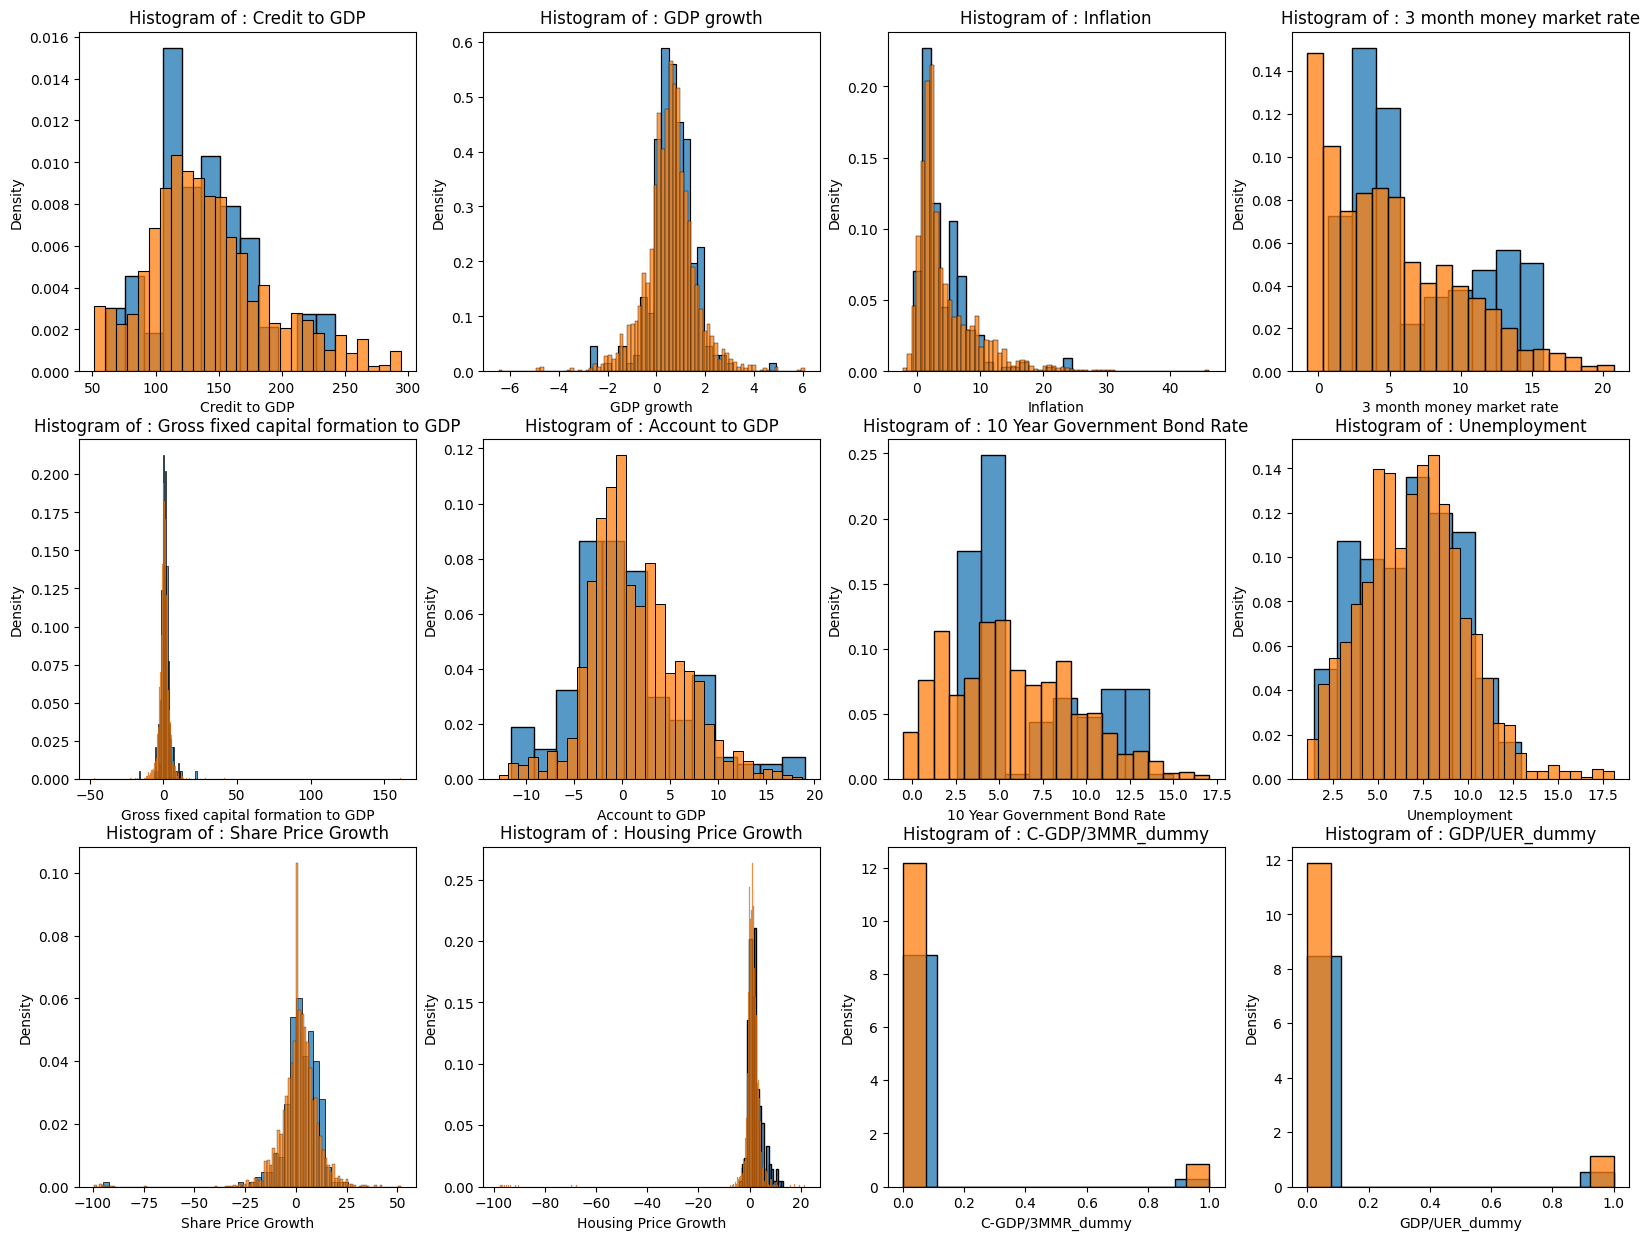

In [85]:
# Be more consistent with dynamics and levels.
# Better yet, have all vars in both levels (where it makes sense) and dynamics (growth rates)

# Comment 2: as a pre-analysis step use df_crisis and df_tranquil to create variable interaction terms
# and then pick for later analysis those that have the most different distributions across datasets

fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(20, 15))
for i, ax in zip(df.columns[3:], axes.flat):
    sns.histplot(x=df_crisis[i], ax=ax, stat='density').set(title=f"Histogram of : {i}", xlabel="")
    sns.histplot(x=df_tranquil[i], ax=ax, color='C1', stat='density')
plt.show()

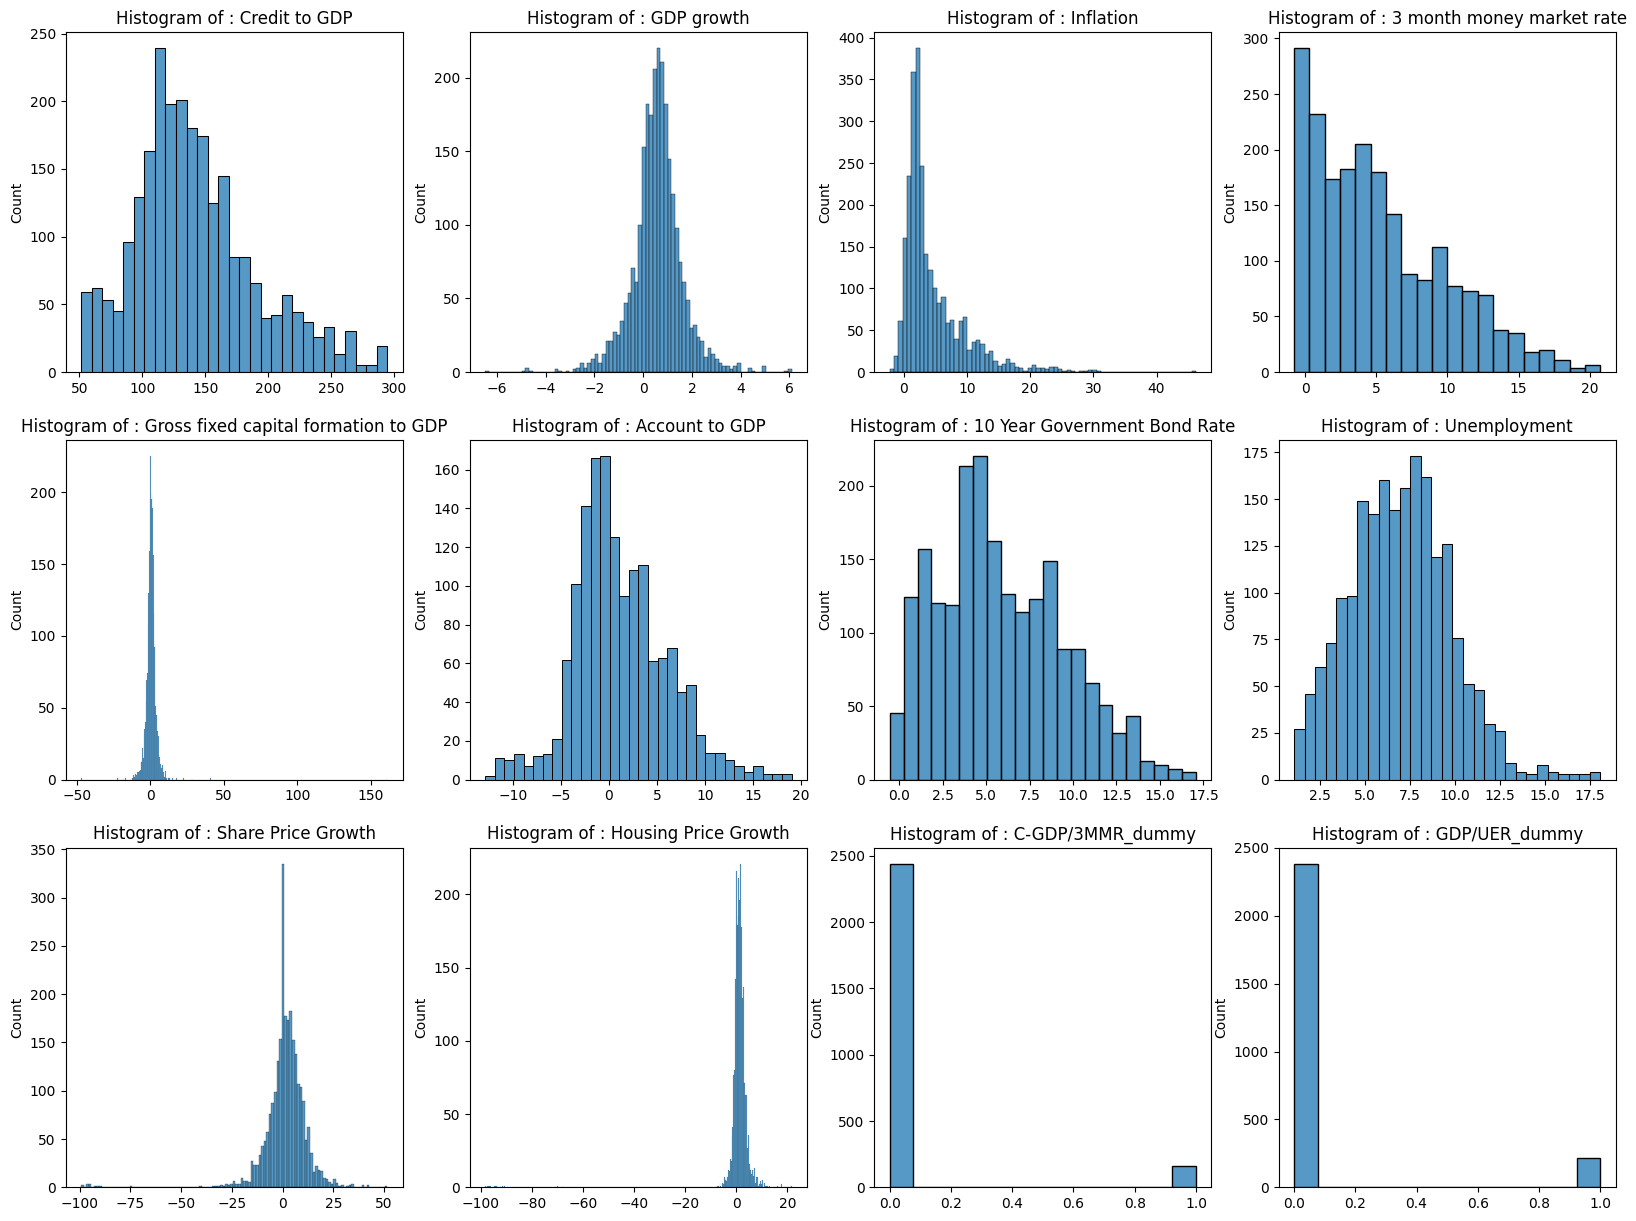

In [86]:
# Be more consistent with dynamics and levels.
# Better yet, have all vars in both levels (where it makes sense) and dynamics (growth rates)

fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(20, 15))
for i, ax in zip(df.columns[3:], axes.flat):
    sns.histplot(x=df[i], ax=ax).set(title=f"Histogram of : {i}", xlabel="")
plt.show()

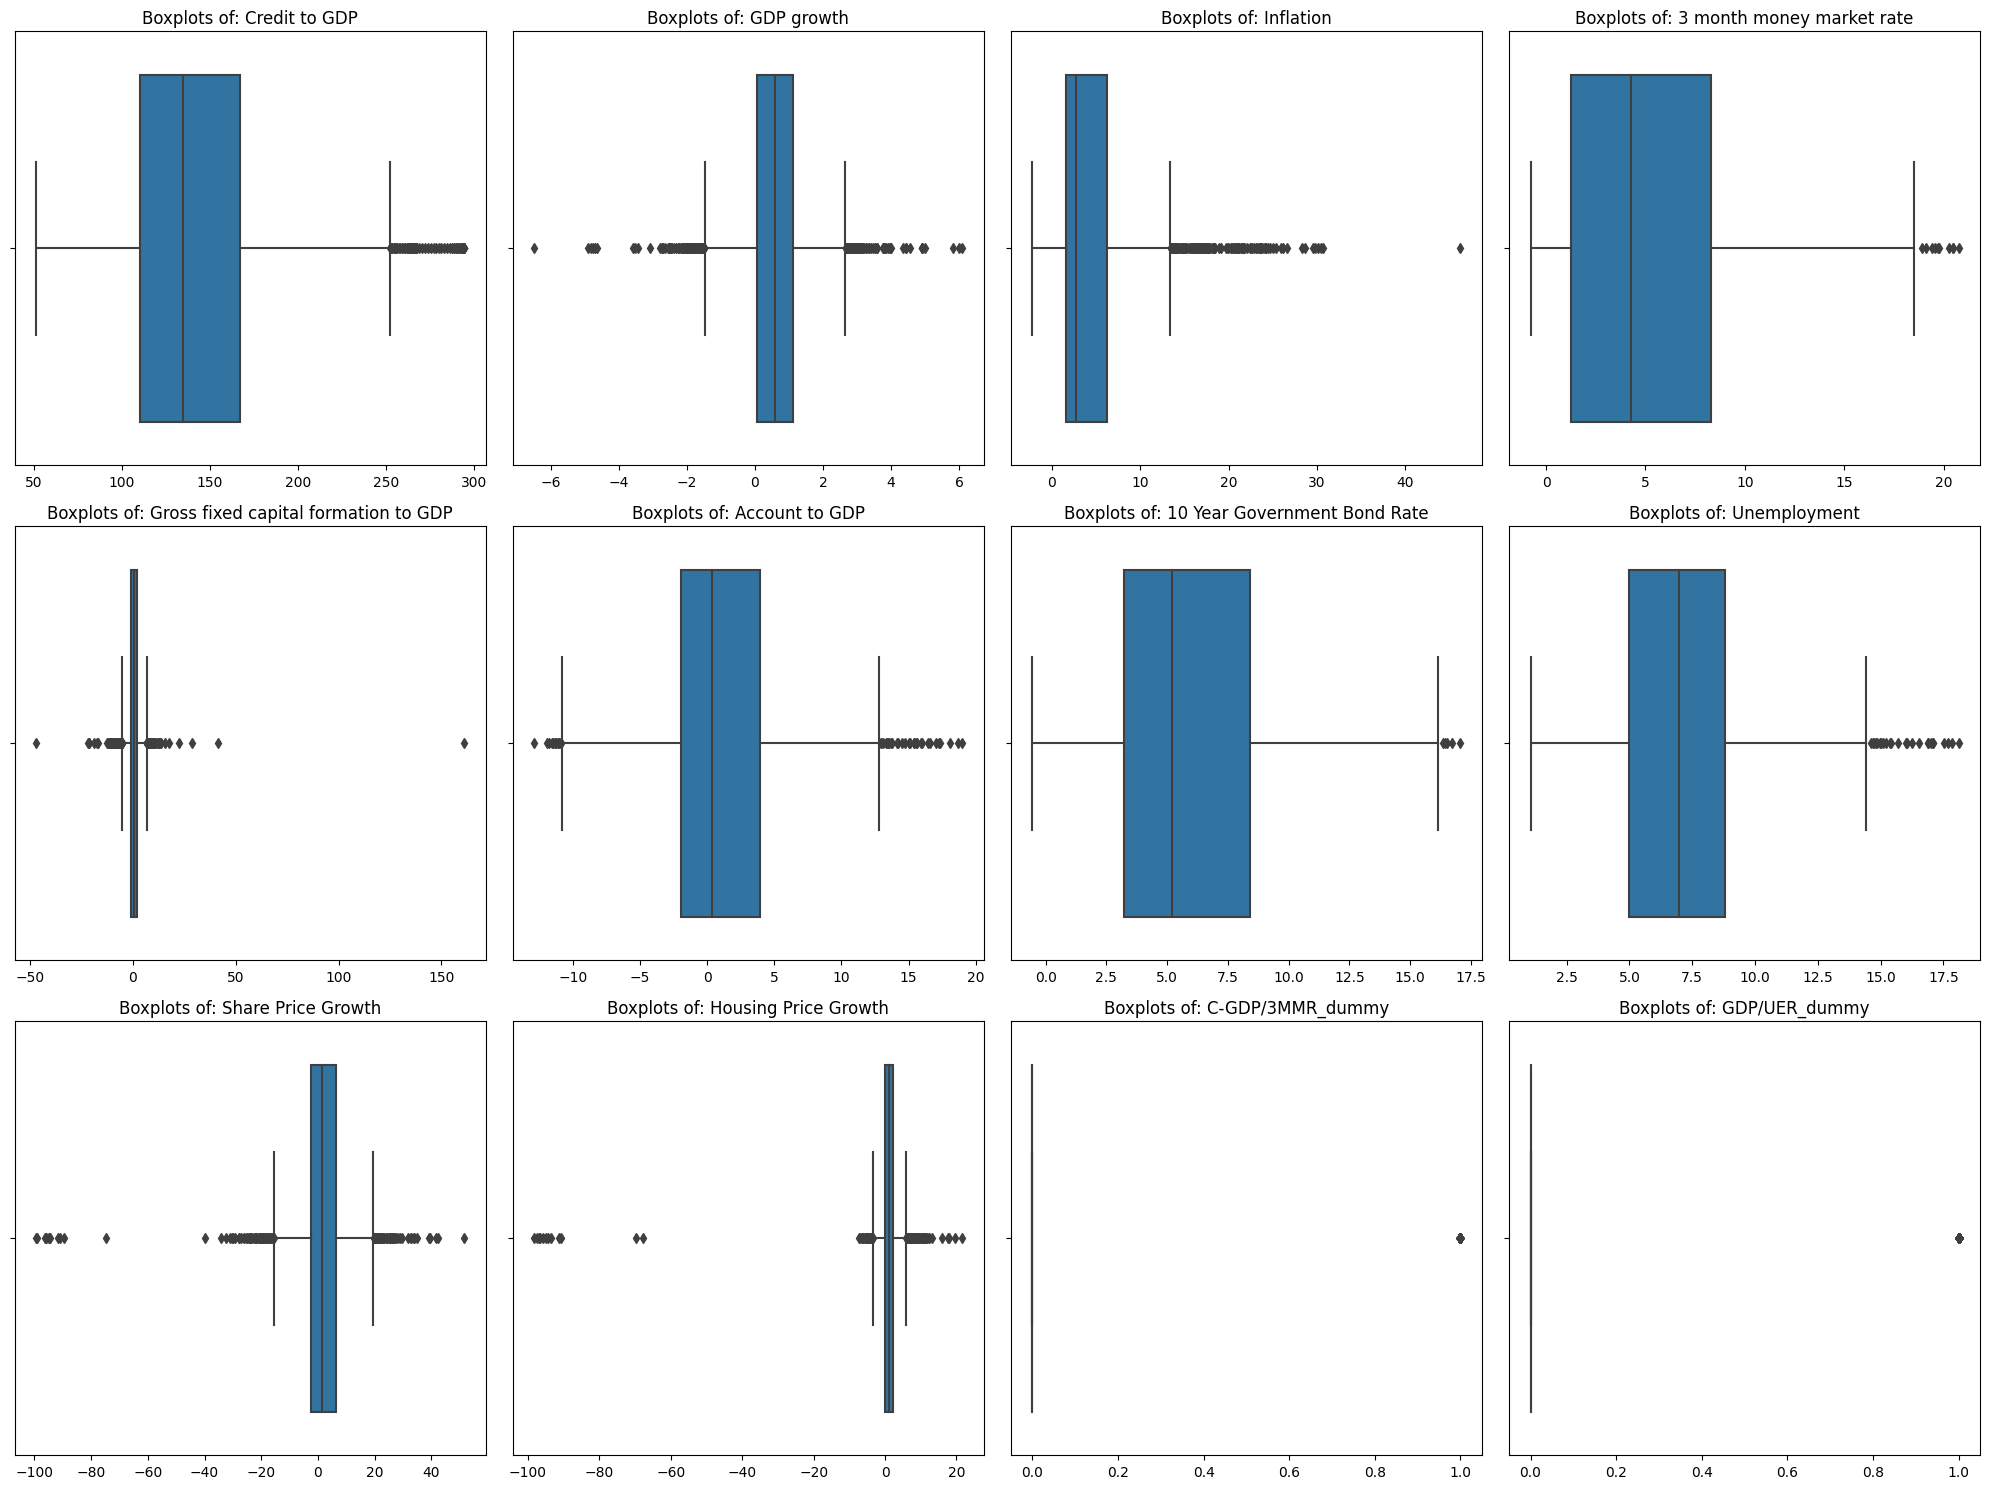

In [87]:
numeric_columns = df.select_dtypes(include='number')

fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(20, 15))

for i, ax in zip(numeric_columns.columns[1:], axes.flat):
    sns.boxplot(x=numeric_columns[i], ax=ax, orient='h')
    ax.set(title=f"Boxplots of: {i}", xlabel="")

plt.tight_layout()
plt.show()

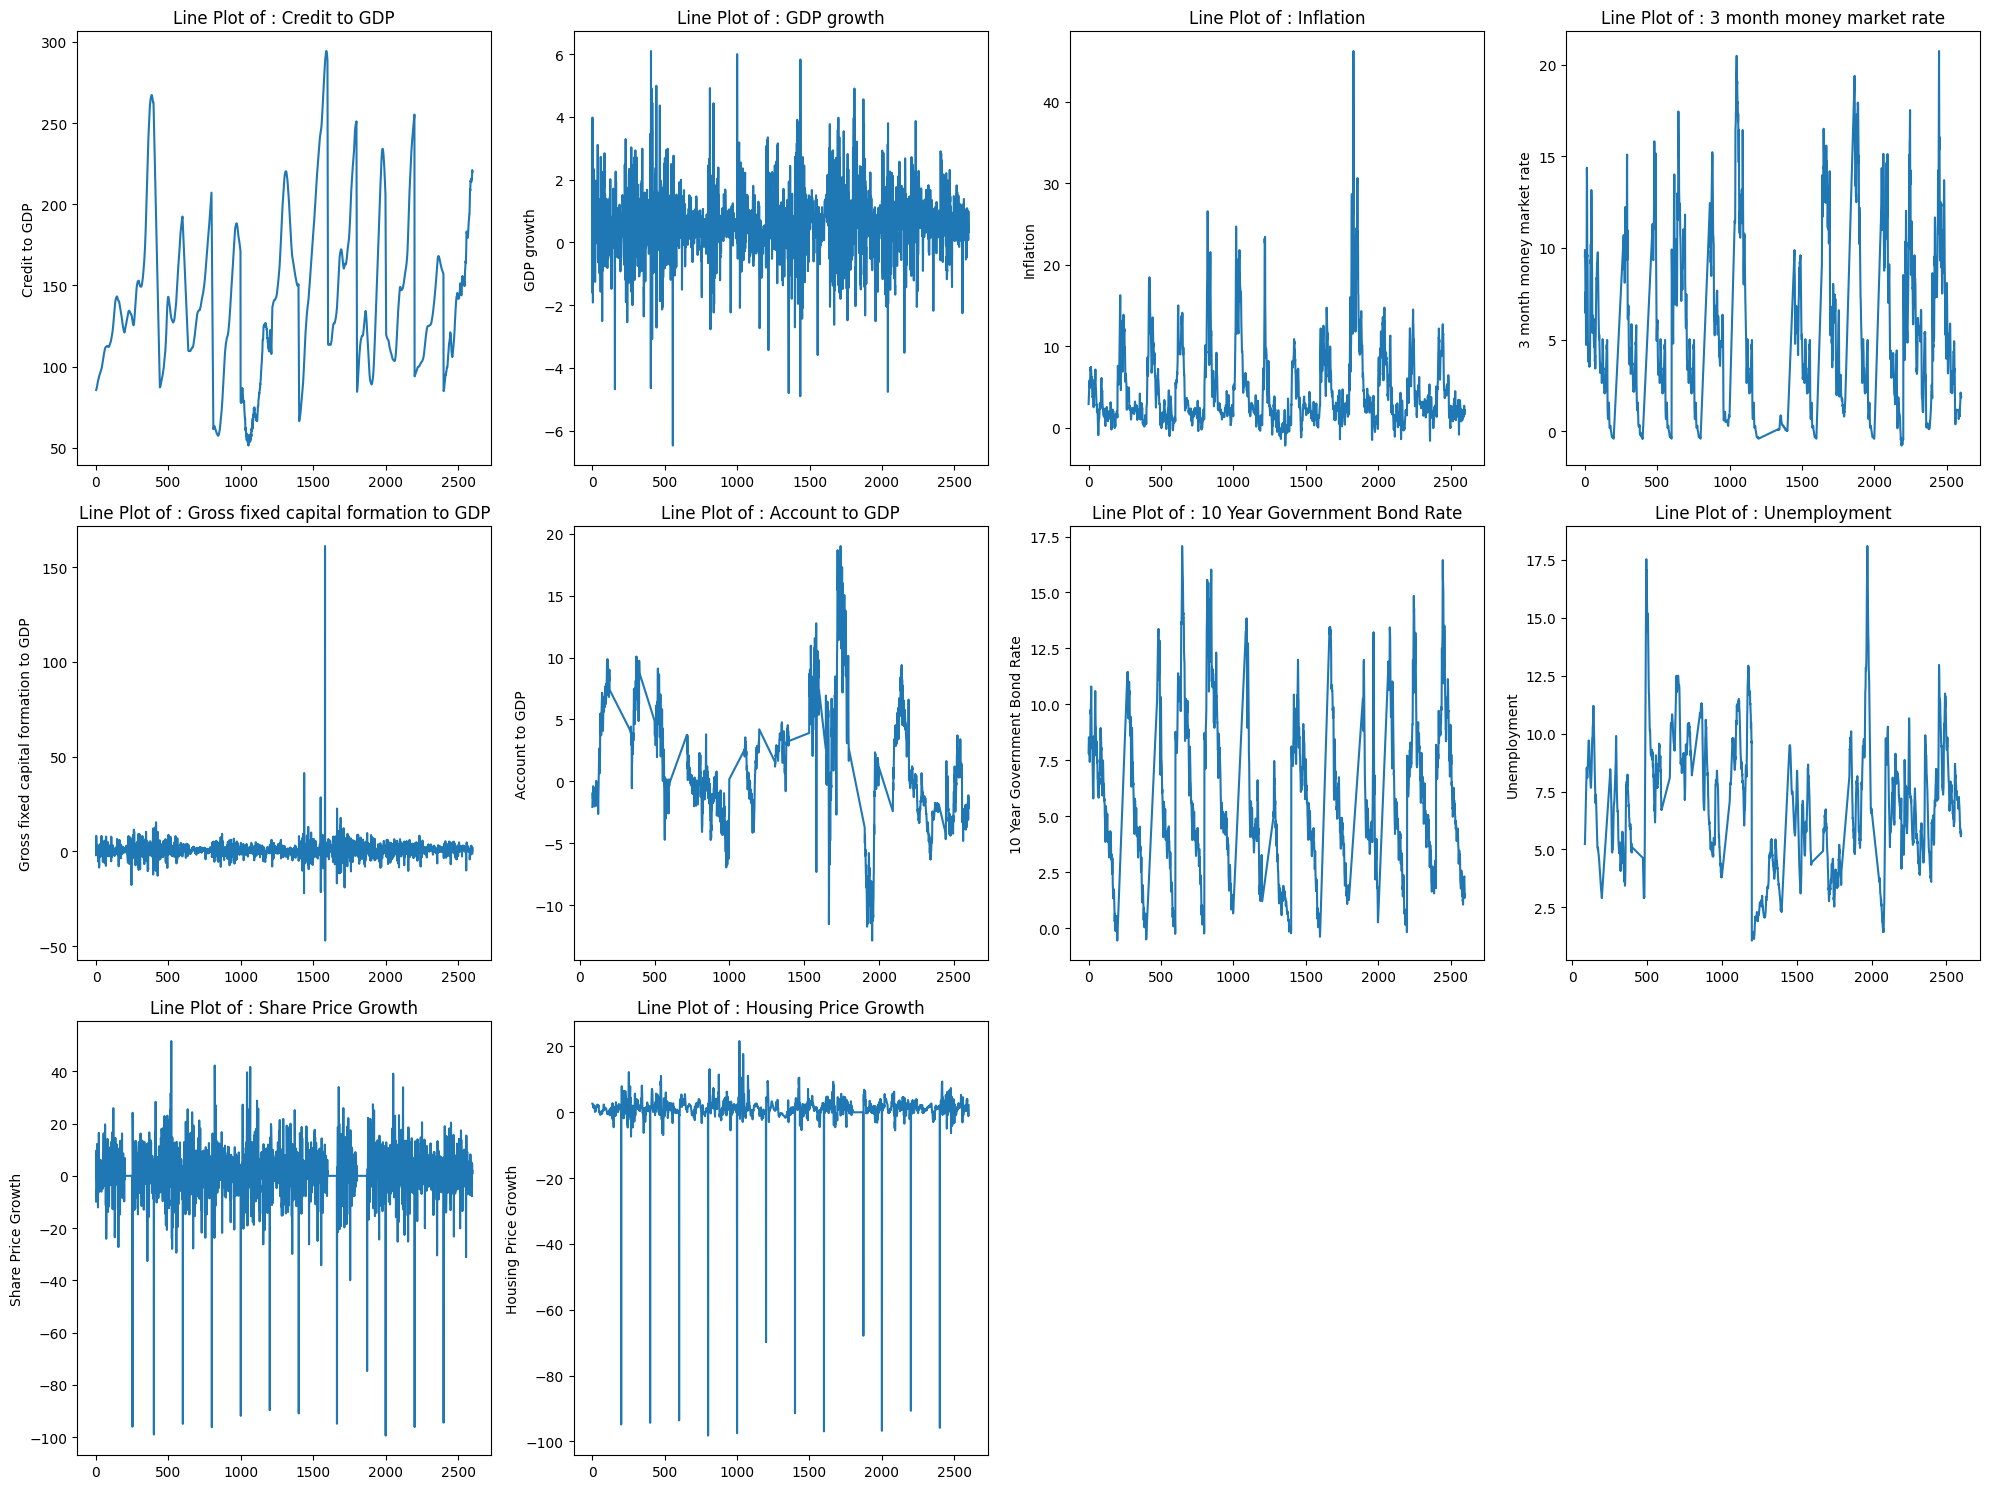

In [88]:
num_variables = len(df.columns) - 3
num_plots = min(10, num_variables)
num_cols = 4
num_rows = (num_plots - 1) // num_cols + 1
fig, axes = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(20, 15))

for i, ax in zip(df.columns[3:], axes.flat):
    sns.lineplot(data=df, x=df.index, y=df[i], ax=ax)
    ax.set(title=f"Line Plot of : {i}", xlabel="")

for i in range(num_plots, num_cols * num_rows):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

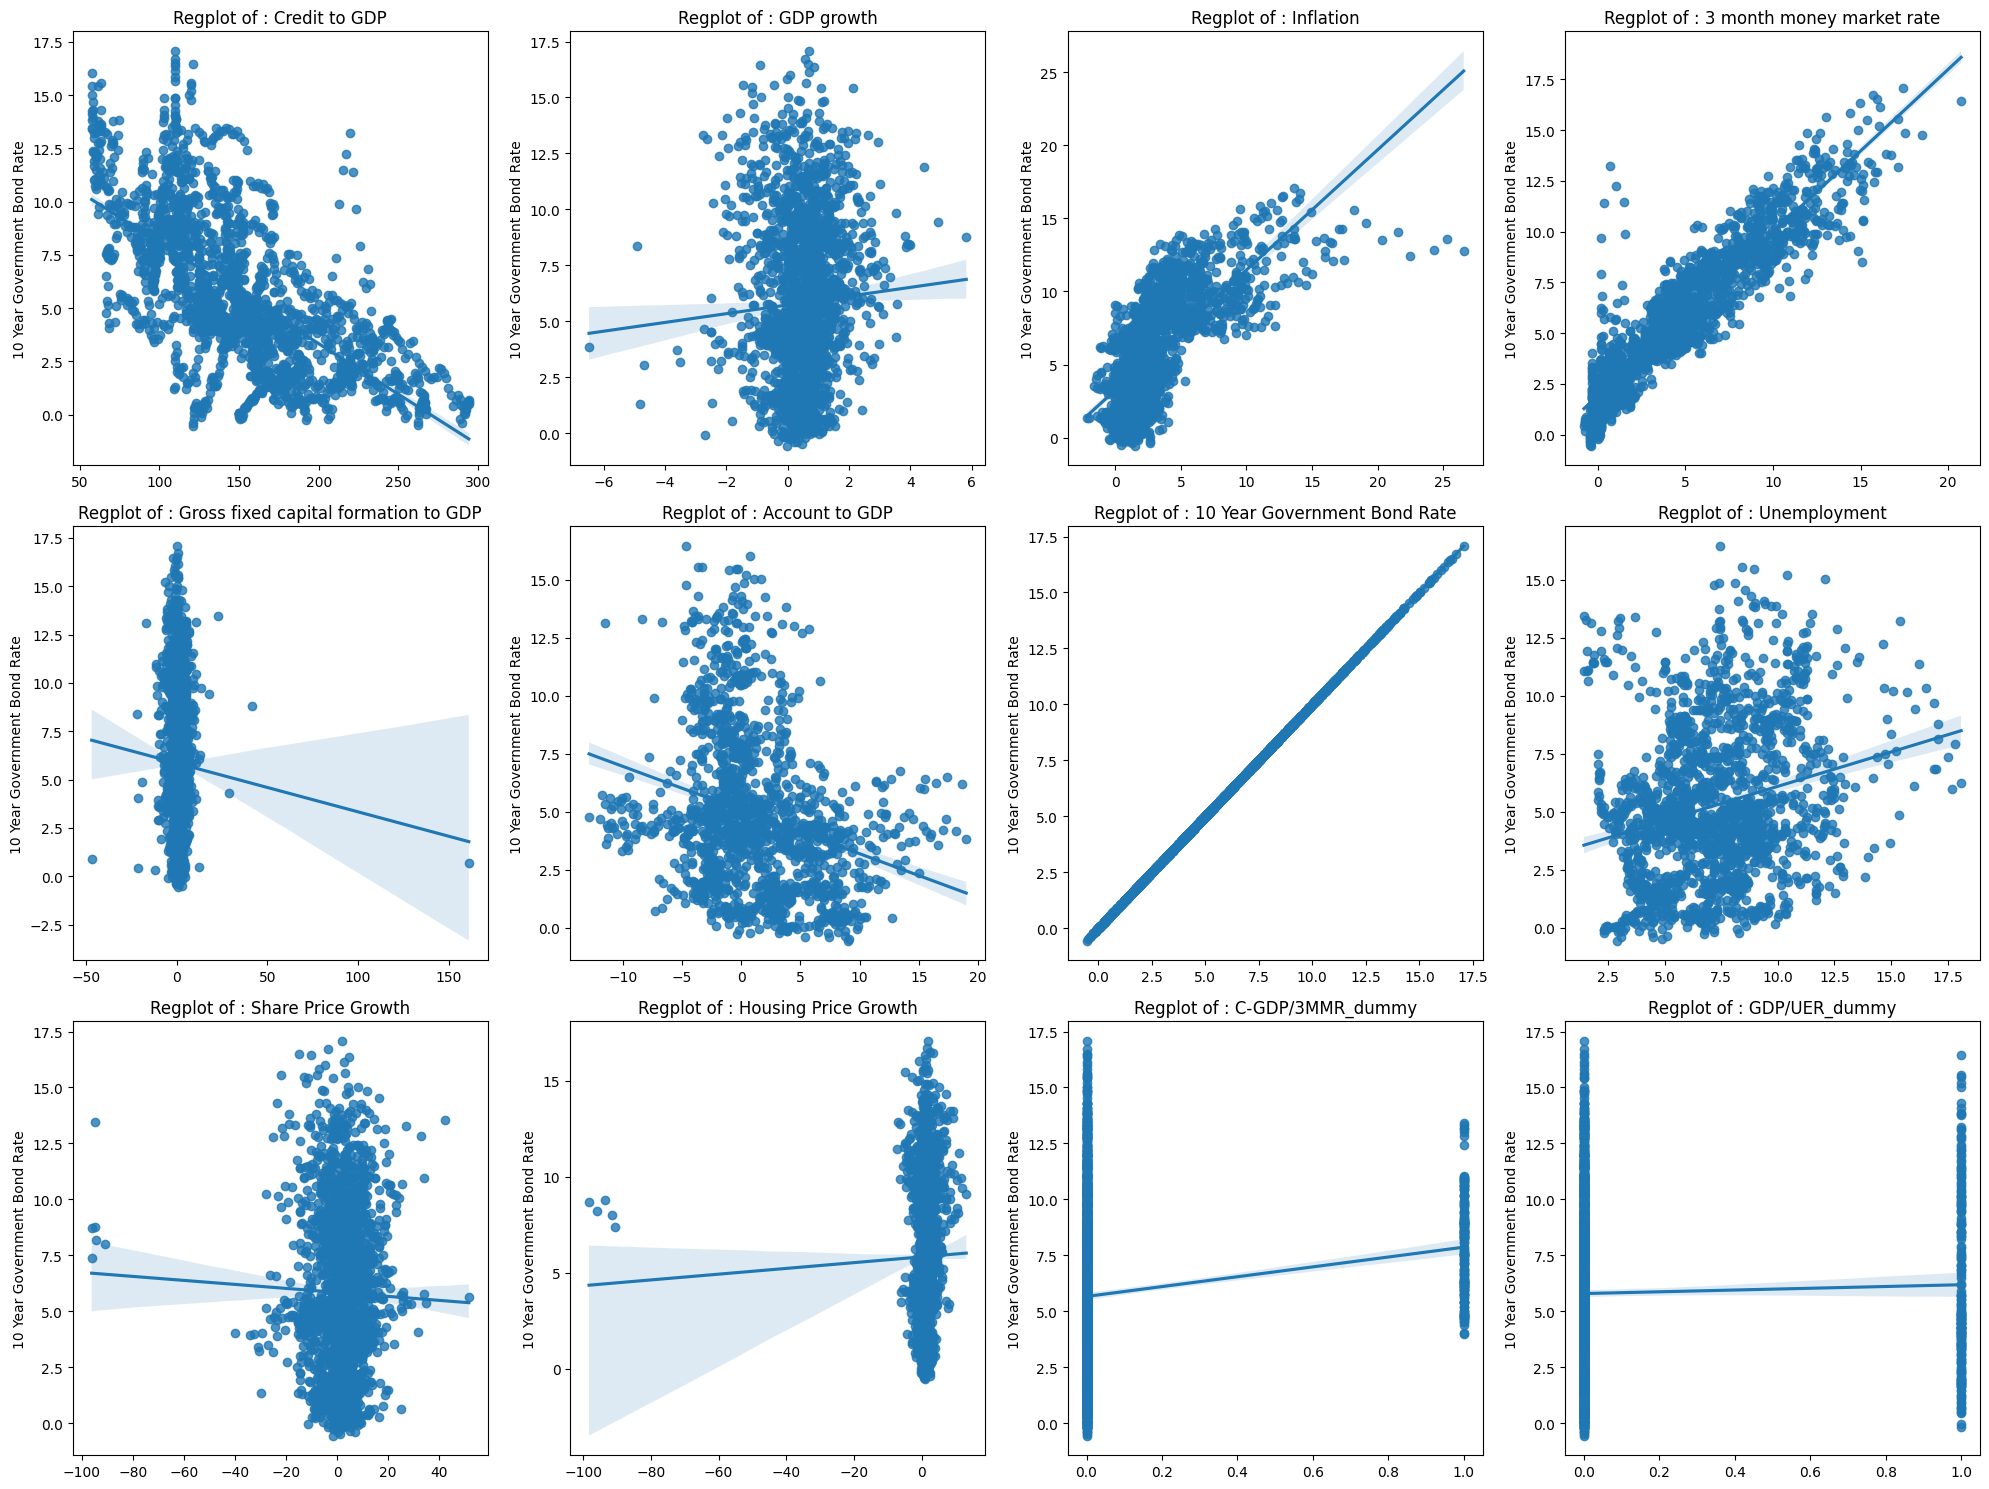

In [89]:
fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(20, 15))

for i, ax in zip(df.columns[3:], axes.flat):
    sns.regplot(x=df[i], y=df["10 Year Government Bond Rate"], ax=ax)
    ax.set(title=f"Regplot of : {i}", xlabel="")

plt.tight_layout()
plt.show()

<ipython-input-90-7d09e942fadd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


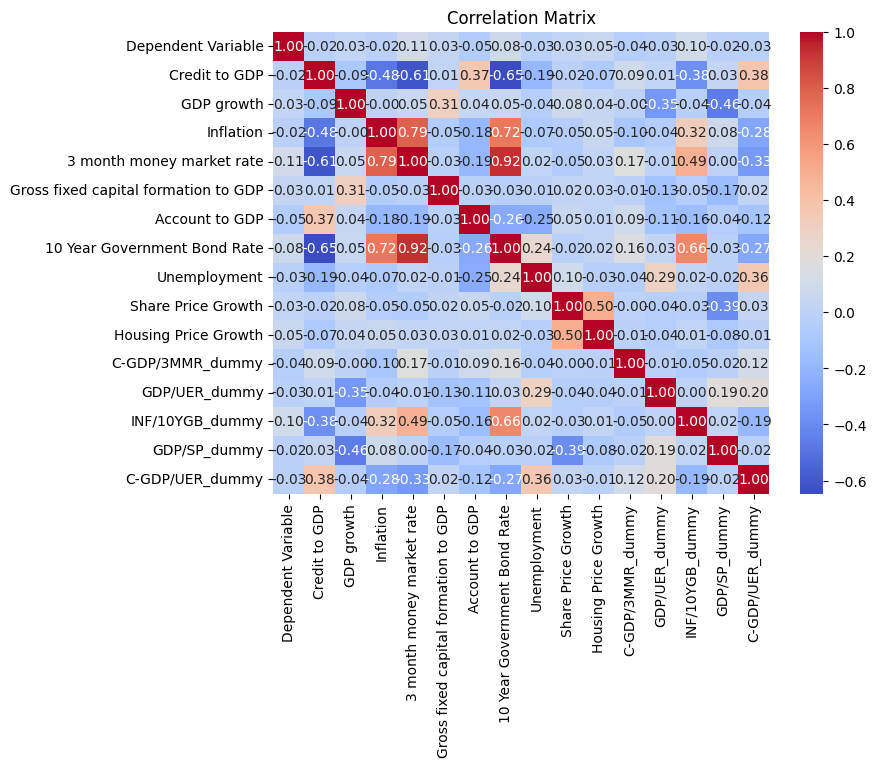

In [90]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [91]:
df

,Country,Date,Dependent Variable,Credit to GDP,GDP growth,Inflation,3 month money market rate,Gross fixed capital formation to GDP,Account to GDP,10 Year Government Bond Rate,Unemployment,Share Price Growth,Housing Price Growth,C-GDP/3MMR_dummy,GDP/UER_dummy,INF/10YGB_dummy,GDP/SP_dummy,C-GDP/UER_dummy
0,DE,1970-Q1,0,NaN,-1.595662,2.894135,9.536667,-1.991301,NaN,7.833333,NaN,NaN,NaN,0,0,0,0,0
1,DE,1970-Q2,0,NaN,3.975818,3.335860,9.890000,8.214446,NaN,8.400000,NaN,-9.805006,2.623882,0,0,0,0,0
2,DE,1970-Q3,0,NaN,1.867836,3.566009,9.370000,5.363654,NaN,8.533334,NaN,-5.464913,2.598879,0,0,0,0,0
3,DE,1970-Q4,0,85.6,0.847607,4.000000,8.830000,-0.028774,NaN,8.500000,NaN,-4.699522,2.584060,0,0,0,0,0
4,DE,1971-Q1,0,85.8,-1.921103,4.441154,7.476666,-1.492452,NaN,7.766667,NaN,9.775263,2.479305,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,CA,2018-Q4,0,216.2,0.340870,2.035623,2.112573,-1.296769,-2.919957,2.318050,5.700000,-7.799183,0.797327,0,0,0,1,0
2596,CA,2019-Q1,0,217.0,0.070759,1.611685,1.997995,1.606348,-3.080937,1.857795,5.800000,4.108793,-0.079974,0,0,0,0,0
2597,CA,2019-Q2,0,219.3,0.988110,2.148389,1.859268,0.004727,-1.128215,1.616548,5.566667,4.659263,-1.154008,0,0,0,0,0
2598,CA,2019-Q3,0,221.0,0.374027,1.939334,1.837570,2.206205,-2.178369,1.362776,5.733333,0.621877,1.305871,0,0,0,1,0


In [92]:
# First try to normalize the "regular" dataset, i.e without unusual outliers, you might include them later if needed
# Nijat: not started yet
from sklearn.preprocessing import RobustScaler

# Specify columns to normalize
columns_to_normalize = df.columns[3:13]

# Extract the subset of the dataframe for normalization
df_subset = df[columns_to_normalize]

# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the data using RobustScaler
df_normalized = pd.DataFrame(scaler.fit_transform(df_subset), columns=columns_to_normalize)

# Concatenate the normalized columns with the non-normalized columns
norm_df = pd.concat([df.iloc[:, :3], df_normalized, df.iloc[:, 13:19]], axis=1)


In [93]:
norm_df.replace(np.nan, 0, inplace=True)

In [94]:
norm_df['Date'] = pd.to_datetime(norm_df['Date'])
norm_df.set_index(['Country', 'Date'], inplace=True)

In [95]:
X = norm_df.drop('Dependent Variable', axis=1)
y = norm_df['Dependent Variable']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [97]:
lr = LogisticRegression(random_state=123).fit(X_train, y_train)

In [98]:
feature_names = norm_df.drop('Dependent Variable', axis=1)
coefficients = lr.coef_[0]
std_errors = np.std(X, 0) * np.sqrt((1 -  lr.score(X_train, y_train)) / (lr.score(X_train, y_train) * len(y_train)))

z_scores = coefficients / std_errors

p_values = [2 * (1 - norm.cdf(np.abs(z))) for z in z_scores]

for feature, coef, z, p in zip(feature_names, coefficients, z_scores, p_values):
    print(f"{feature}: Coefficient = {coef:.4f}, Z-score = {z:.4f}, P-value = {p:.4f}")

Credit to GDP: Coefficient = 0.1957, Z-score = 34.8900, P-value = 0.0000
GDP growth: Coefficient = 0.0231, Z-score = 3.4141, P-value = 0.0006
Inflation: Coefficient = -0.6367, Z-score = -92.3577, P-value = 0.0000
3 month money market rate: Coefficient = 0.8684, Z-score = 222.4133, P-value = 0.0000
Gross fixed capital formation to GDP: Coefficient = 0.0141, Z-score = 1.3563, P-value = 0.1750
Account to GDP: Coefficient = -0.2483, Z-score = -58.2071, P-value = 0.0000
10 Year Government Bond Rate: Coefficient = -0.0696, Z-score = -16.5381, P-value = 0.0000
Unemployment: Coefficient = -0.0646, Z-score = -14.8369, P-value = 0.0000
Share Price Growth: Coefficient = 0.0572, Z-score = 7.0576, P-value = 0.0000
Housing Price Growth: Coefficient = 0.3130, Z-score = 16.0788, P-value = 0.0000
C-GDP/3MMR_dummy: Coefficient = -1.1708, Z-score = -723.9996, P-value = 0.0000
GDP/UER_dummy: Coefficient = -0.3091, Z-score = -165.6152, P-value = 0.0000
INF/10YGB_dummy: Coefficient = 0.7058, Z-score = 284.7

In [99]:
intercept = lr.intercept_[0]

# Calculate the standard error of the intercept
std_error_intercept = np.sqrt((1 - lr.score(X_train, y_train)) / (lr.score(X_train, y_train) * len(y_train)))

# Calculate the z-score for the intercept
z_score_intercept = intercept / std_error_intercept

# Calculate the two-tailed p-value for the intercept
p_value_intercept = 2 * (1 - norm.cdf(np.abs(z_score_intercept)))

# Print the intercept, z-score, and p-value for the intercept
print(f"Intercept: {intercept:.4f}, Z-score = {z_score_intercept:.4f}, P-value = {p_value_intercept:.4f}")

Intercept: -2.4300, Z-score = -360.0609, P-value = 0.0000


In [100]:
num_folds = 10
y_trainr = np.ravel(y_train)

cross_val_scores = cross_val_score(lr, X_train, y_trainr, cv=num_folds, scoring='accuracy')


for fold, score in enumerate(cross_val_scores, start=1):
    print(f"Fold {fold}: {score:.4f}")

mean_score = cross_val_scores.mean()
std_deviation = cross_val_scores.std()
print(f"Mean Accuracy: {mean_score:.4f}")
print(f"Standard Deviation: {std_deviation:.4f}")

Fold 1: 0.9135
Fold 2: 0.9135
Fold 3: 0.9135
Fold 4: 0.9135
Fold 5: 0.9183
Fold 6: 0.9135
Fold 7: 0.9183
Fold 8: 0.9087
Fold 9: 0.9135
Fold 10: 0.9087
Mean Accuracy: 0.9135
Standard Deviation: 0.0030


In [149]:
threshold = 0.35
y_probs_lr = lr.predict_proba(X_test)[:, 1]
y_pred_lr = np.where(y_probs_lr >= threshold, 1, 0)

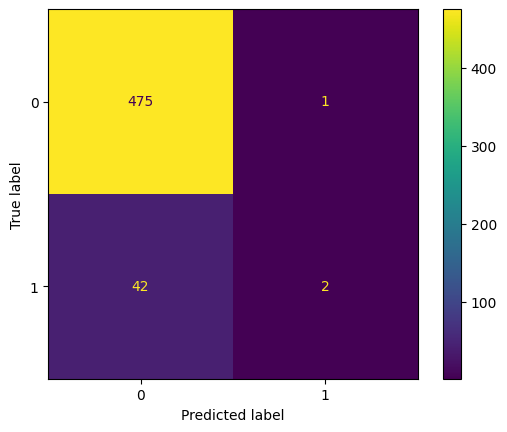

In [150]:
confusion_matrix_lr = metrics.confusion_matrix(y_test, y_pred_lr)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_lr, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [151]:
recall_score(y_test, y_pred_lr)

0.045454545454545456

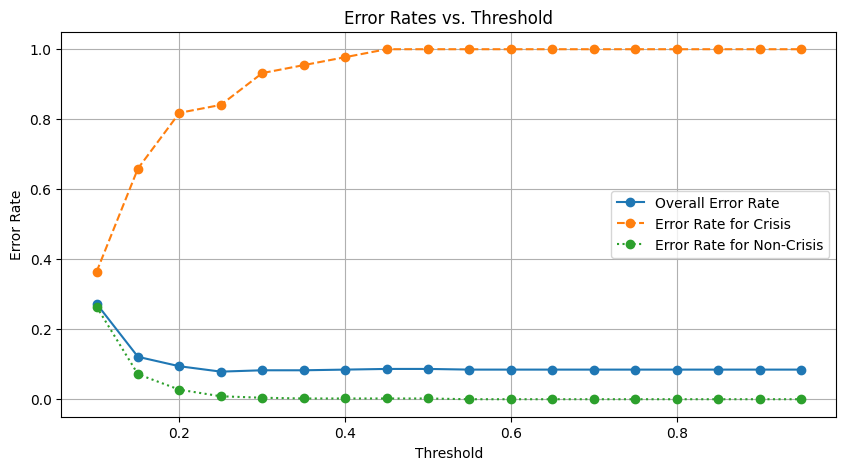

In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm

# Train the logistic regression model (replace with your data)
model = LogisticRegression()
result = model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

In [107]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_lr.ravel()

# Define mu and class probabilities
mu = 0.9  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulnesssd
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

Loss: 0.07288461538461538
Absolute Usefulness: 0.0032692307692307743
Relative Usefulness: 0.042929292929293


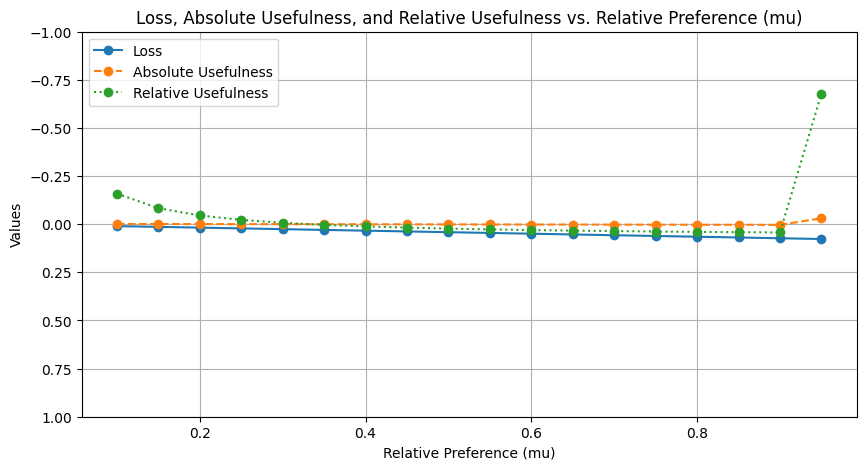

In [108]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix as cm

# Define a range of mu (relative preference) values
mu_values = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store Loss, Absolute Usefulness, and Relative Usefulness
loss_values = []
absolute_usefulness_values = []
relative_usefulness_values = []

for mu in mu_values:
    # Extract values from the confusion matrix
    TN, FP, FN, TP = confusion_matrix_lr.ravel()

    # Define class probabilities
    P1 = (TP + FN) / len(y_test)  # Probability of crises class
    P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

    # Calculate T1 and T2 from the confusion matrix
    T1 = FN / (TP + FN)  # Type I errors (missed crises)
    T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

    # Compute the loss function
    loss = mu * T1 * P1 + (1 - mu) * T2 * P2

    # Compute the absolute usefulness
    min_loss = min(mu * P1, (1 - mu) * P2)
    absolute_usefulness = min_loss - loss

    # Compute the relative usefulness
    max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
    relative_usefulness = absolute_usefulness / max_possible_usefulness

    # Append values to the lists
    loss_values.append(loss)
    absolute_usefulness_values.append(absolute_usefulness)
    relative_usefulness_values.append(relative_usefulness)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(mu_values, loss_values, label='Loss', marker='o', linestyle='-')
plt.plot(mu_values, absolute_usefulness_values, label='Absolute Usefulness', marker='o', linestyle='--')
plt.plot(mu_values, relative_usefulness_values, label='Relative Usefulness', marker='o', linestyle=':')
plt.xlabel('Relative Preference (mu)')
plt.ylabel('Values')
plt.title('Loss, Absolute Usefulness, and Relative Usefulness vs. Relative Preference (mu)')
plt.ylim(1, -1)  # Set the y-axis limits to range from 1 to -1
plt.grid(True)
plt.legend()
plt.show()

## LASSO

In [109]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9]  # Adjust the balance between L1 and L2 regularization for Elastic Net
}

# Create a Logistic Regression model
logistic = LogisticRegression(solver='saga', max_iter=1000)

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(logistic, param_grid, cv=10, scoring='recall', verbose=1)

# Fit the model and find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters for Logistic Regression:", grid_search.best_params_)
print("Best recall score for Logistic Regression:", grid_search.best_score_)

Fitting 10 folds for each of 45 candidates, totalling 450 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_

Best hyperparameters for Logistic Regression: {'C': 1, 'l1_ratio': 0.1, 'penalty': 'l1'}
Best recall score for Logistic Regression: 0.01111111111111111


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [110]:
lasso = LogisticRegression(C=1, penalty='l1', l1_ratio = 0.1, solver='saga', max_iter=1000, random_state=123)
lasso.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1, l1_ratio=0.1, max_iter=1000, penalty='l1',
                   random_state=123, solver='saga')

In [111]:
threshold = 0.2
y_probs_lasso = lasso.predict_proba(X_test)[:, 1]
y_pred_lasso = np.where(y_probs_lasso >= threshold, 1, 0)

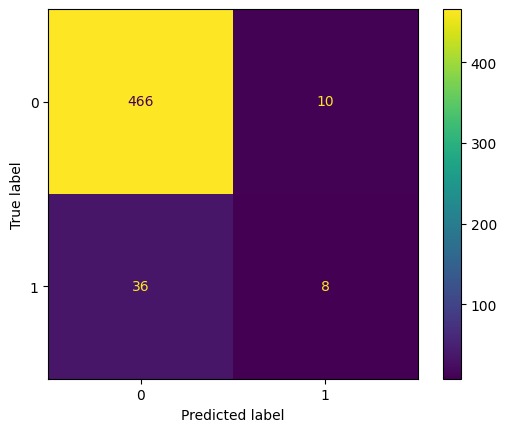

In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_lasso = confusion_matrix(y_test, y_pred_lasso)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lasso, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [113]:
recall_score(y_test, y_pred_lasso)

0.18181818181818182

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


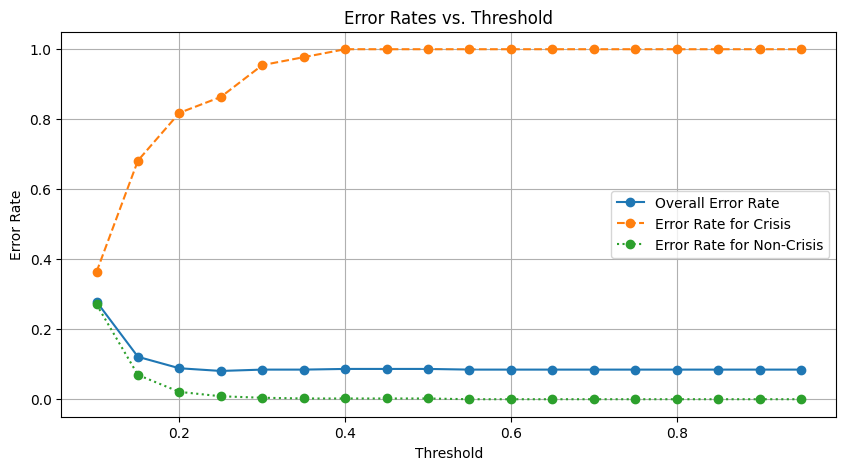

In [114]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np

# Replace 'LogisticRegression()' with your specific model using the best hyperparameters
model = lasso  # Assuming 'best_lr' is your model from earlier

# Fit the model to your training data (if not already done)
model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

In [115]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_lasso.ravel()

# Define mu and class probabilities
mu = 0.6  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

Loss: 0.04923076923076923
Absolute Usefulness: 0.0015384615384615372
Relative Usefulness: 0.03030303030303028


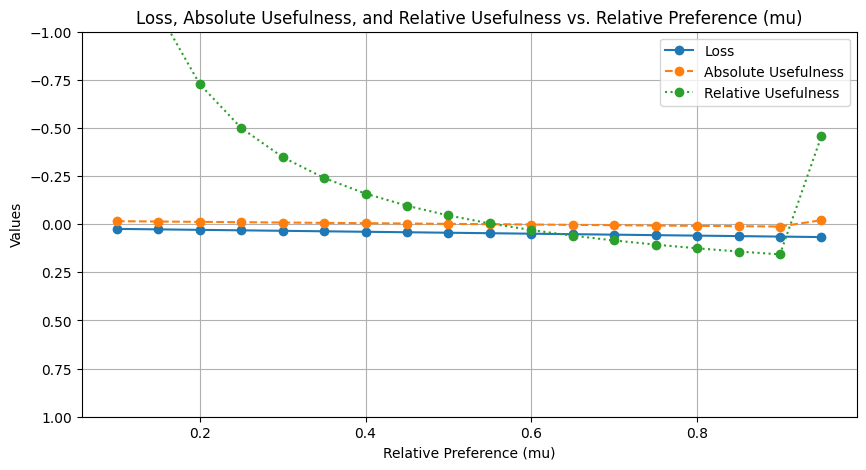

In [116]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix as cm

# Define a range of mu (relative preference) values
mu_values = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store Loss, Absolute Usefulness, and Relative Usefulness
loss_values = []
absolute_usefulness_values = []
relative_usefulness_values = []

for mu in mu_values:
    # Extract values from the confusion matrix
    TN, FP, FN, TP = confusion_matrix_lasso.ravel()

    # Define class probabilities
    P1 = (TP + FN) / len(y_test)  # Probability of crises class
    P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

    # Calculate T1 and T2 from the confusion matrix
    T1 = FN / (TP + FN)  # Type I errors (missed crises)
    T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

    # Compute the loss function
    loss = mu * T1 * P1 + (1 - mu) * T2 * P2

    # Compute the absolute usefulness
    min_loss = min(mu * P1, (1 - mu) * P2)
    absolute_usefulness = min_loss - loss

    # Compute the relative usefulness
    max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
    relative_usefulness = absolute_usefulness / max_possible_usefulness

    # Append values to the lists
    loss_values.append(loss)
    absolute_usefulness_values.append(absolute_usefulness)
    relative_usefulness_values.append(relative_usefulness)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(mu_values, loss_values, label='Loss', marker='o', linestyle='-')
plt.plot(mu_values, absolute_usefulness_values, label='Absolute Usefulness', marker='o', linestyle='--')
plt.plot(mu_values, relative_usefulness_values, label='Relative Usefulness', marker='o', linestyle=':')
plt.xlabel('Relative Preference (mu)')
plt.ylabel('Values')
plt.title('Loss, Absolute Usefulness, and Relative Usefulness vs. Relative Preference (mu)')
plt.ylim(1, -1)  # Set the y-axis limits to range from 1 to -1
plt.grid(True)
plt.legend()
plt.show()

### KNN

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn = KNeighborsClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create a GridSearchCV object
knn_grid = GridSearchCV(knn, param_grid, cv=10, scoring='recall')

# Fit the model to your data (replace X_train and y_train with your data)
knn_grid.fit(X_train, y_train)

# Get the best hyperparameters and score
best_knn_params = knn_grid.best_params_
best_knn_score = knn_grid.best_score_

print("Best hyperparameters for KNN:", best_knn_params)
print("Best recall score for KNN:", best_knn_score)


Best hyperparameters for KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best recall score for KNN: 0.3871345029239766


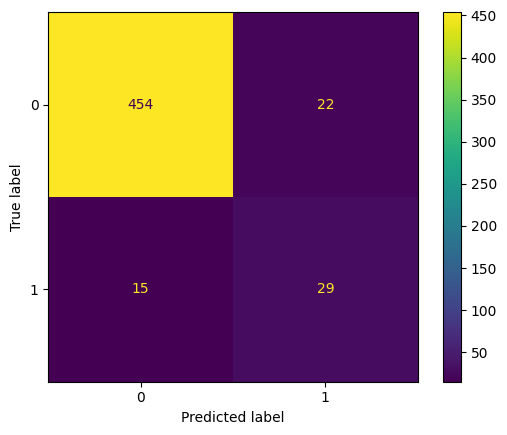

In [166]:
knn = KNeighborsClassifier(n_neighbors= 3, p= 1, weights='distance')
knn.fit(X_train, y_train)

threshold = 0.35

y_probs_knn = knn.predict_proba(X_test)[:, 1]
y_pred_knn = np.where(y_probs_knn >= threshold, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_knn, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [167]:
recall_score(y_test, y_pred_knn)

0.6590909090909091

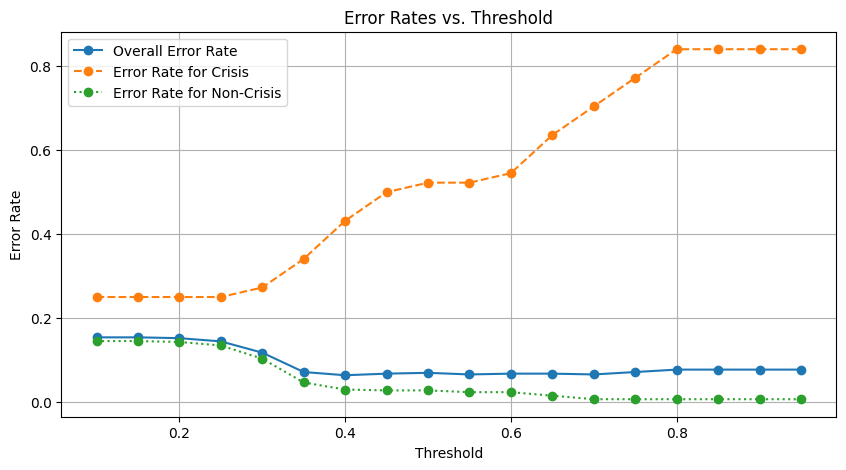

In [133]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np

# Replace 'LogisticRegression()' with your specific model using the best hyperparameters
model = knn  # Assuming 'best_lr' is your model from earlier

# Fit the model to your training data (if not already done)
model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

In [134]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_knn.ravel()

# Define mu and class probabilities
mu = 0.9 # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

Loss: 0.030192307692307692
Absolute Usefulness: 0.04596153846153846
Relative Usefulness: 0.6035353535353536


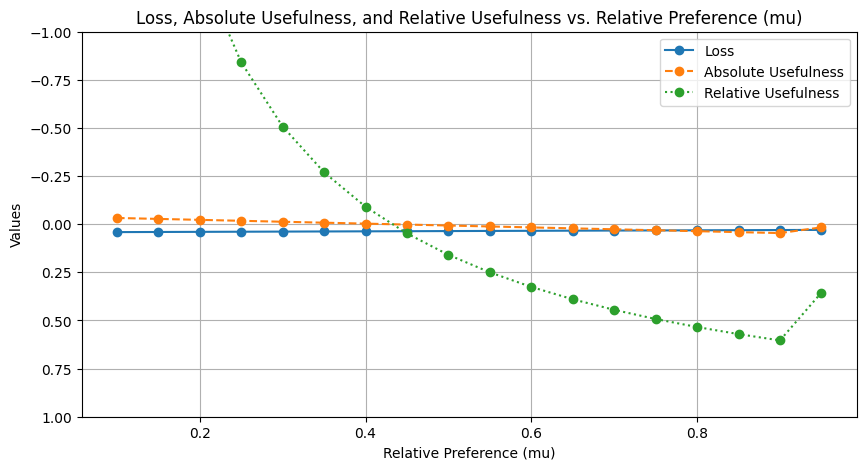

In [135]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix as cm

# Define a range of mu (relative preference) values
mu_values = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store Loss, Absolute Usefulness, and Relative Usefulness
loss_values = []
absolute_usefulness_values = []
relative_usefulness_values = []

for mu in mu_values:
    # Extract values from the confusion matrix
    TN, FP, FN, TP = confusion_matrix_knn.ravel()

    # Define class probabilities
    P1 = (TP + FN) / len(y_test)  # Probability of crises class
    P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

    # Calculate T1 and T2 from the confusion matrix
    T1 = FN / (TP + FN)  # Type I errors (missed crises)
    T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

    # Compute the loss function
    loss = mu * T1 * P1 + (1 - mu) * T2 * P2

    # Compute the absolute usefulness
    min_loss = min(mu * P1, (1 - mu) * P2)
    absolute_usefulness = min_loss - loss

    # Compute the relative usefulness
    max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
    relative_usefulness = absolute_usefulness / max_possible_usefulness

    # Append values to the lists
    loss_values.append(loss)
    absolute_usefulness_values.append(absolute_usefulness)
    relative_usefulness_values.append(relative_usefulness)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(mu_values, loss_values, label='Loss', marker='o', linestyle='-')
plt.plot(mu_values, absolute_usefulness_values, label='Absolute Usefulness', marker='o', linestyle='--')
plt.plot(mu_values, relative_usefulness_values, label='Relative Usefulness', marker='o', linestyle=':')
plt.xlabel('Relative Preference (mu)')
plt.ylabel('Values')
plt.title('Loss, Absolute Usefulness, and Relative Usefulness vs. Relative Preference (mu)')
plt.ylim(1, -1)  # Set the y-axis limits to range from 1 to -1
plt.grid(True)
plt.legend()
plt.show()

### SVM

In [136]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Create an SVM classifier
svm = SVC()

# Define a grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1]
}

# Create a GridSearchCV object
svm_grid = GridSearchCV(svm, param_grid, cv=10, scoring='recall')

# Fit the model to your data (replace X_train and y_train with your data)
svm_grid.fit(X_train, y_train)

# Get the best hyperparameters and score
best_svm_params = svm_grid.best_params_
best_svm_score = svm_grid.best_score_

print("Best hyperparameters for SVM:", best_svm_params)
print("Best recall score for SVM:", best_svm_score)


Best hyperparameters for SVM: {'C': 10, 'gamma': 1, 'kernel': 'poly'}
Best recall score for SVM: 0.4473684210526316
CPU times: user 3min 24s, sys: 292 ms, total: 3min 25s
Wall time: 3min 28s


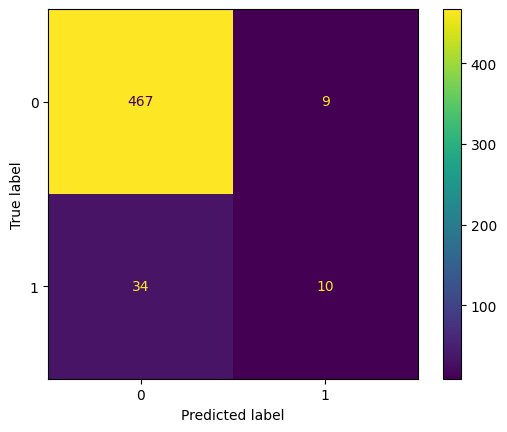

In [170]:
from sklearn.svm import SVC
svm = SVC(C=10, gamma=1, kernel='rbf', probability=True, random_state=42)
svm.fit(X_train, y_train)

threshold = 0.35
y_probs_svm = svm.predict_proba(X_test)[:, 1]
y_pred_svm = np.where(y_probs_svm >= threshold, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_svm, display_labels=[0, 1])
cm_display.plot()
plt.show()


In [171]:
recall_score(y_test, y_pred_svm)

0.22727272727272727

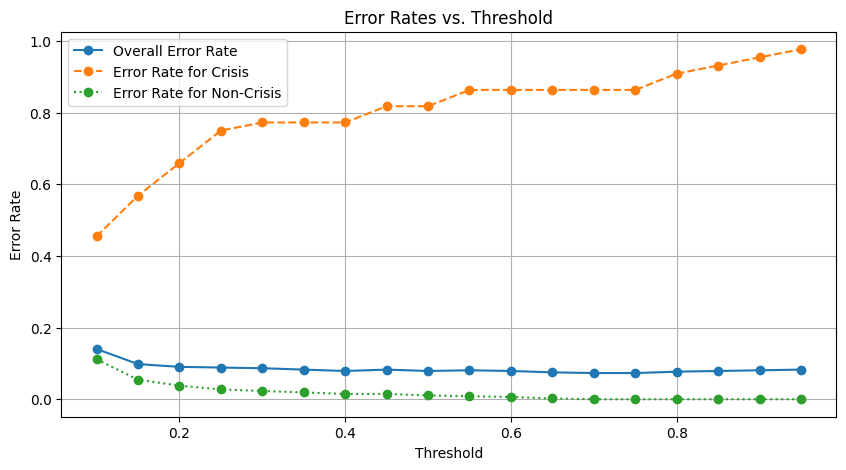

In [153]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np

# Replace 'LogisticRegression()' with your specific model using the best hyperparameters
model = svm  # Assuming 'best_lr' is your model from earlier

# Fit the model to your training data (if not already done)
model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

In [154]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_svm.ravel()

# Define mu and class probabilities
mu = 0.9  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

Loss: 0.06057692307692308
Absolute Usefulness: 0.015576923076923078
Relative Usefulness: 0.20454545454545456


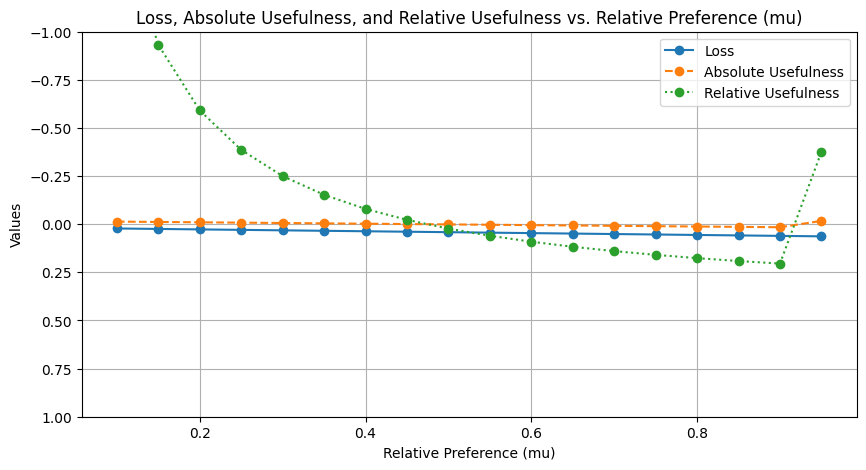

In [155]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix as cm

# Define a range of mu (relative preference) values
mu_values = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store Loss, Absolute Usefulness, and Relative Usefulness
loss_values = []
absolute_usefulness_values = []
relative_usefulness_values = []

for mu in mu_values:
    # Extract values from the confusion matrix
    TN, FP, FN, TP = confusion_matrix_svm.ravel()

    # Define class probabilities
    P1 = (TP + FN) / len(y_test)  # Probability of crises class
    P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

    # Calculate T1 and T2 from the confusion matrix
    T1 = FN / (TP + FN)  # Type I errors (missed crises)
    T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

    # Compute the loss function
    loss = mu * T1 * P1 + (1 - mu) * T2 * P2

    # Compute the absolute usefulness
    min_loss = min(mu * P1, (1 - mu) * P2)
    absolute_usefulness = min_loss - loss

    # Compute the relative usefulness
    max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
    relative_usefulness = absolute_usefulness / max_possible_usefulness

    # Append values to the lists
    loss_values.append(loss)
    absolute_usefulness_values.append(absolute_usefulness)
    relative_usefulness_values.append(relative_usefulness)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(mu_values, loss_values, label='Loss', marker='o', linestyle='-')
plt.plot(mu_values, absolute_usefulness_values, label='Absolute Usefulness', marker='o', linestyle='--')
plt.plot(mu_values, relative_usefulness_values, label='Relative Usefulness', marker='o', linestyle=':')
plt.xlabel('Relative Preference (mu)')
plt.ylabel('Values')
plt.title('Loss, Absolute Usefulness, and Relative Usefulness vs. Relative Preference (mu)')
plt.ylim(1, -1)  # Set the y-axis limits to range from 1 to -1
plt.grid(True)
plt.legend()
plt.show()

### DECISION TREE

In [156]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
dt_grid = GridSearchCV(dt, param_grid, cv=10, scoring='recall')

# Fit the model to your data (replace X_train and y_train with your data)
dt_grid.fit(X_train, y_train)

# Get the best hyperparameters and score
best_dt_params = dt_grid.best_params_
best_dt_score = dt_grid.best_score_

print("Best hyperparameters for Decision Tree:", best_dt_params)
print("Best recall score for Decision Tree:", best_dt_score)


Best hyperparameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best recall score for Decision Tree: 0.6023391812865496


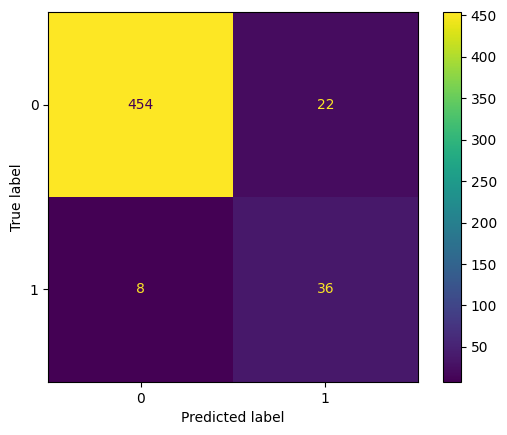

In [172]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= None, min_samples_leaf=4, min_samples_split=10, random_state=123)
dt.fit(X_train, y_train)

threshold = 0.3
y_probs_dt = dt.predict_proba(X_test)[:, 1]
y_pred_dt = np.where(y_probs_dt >= threshold, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [173]:
recall_score(y_test, y_pred_dt)

0.8181818181818182

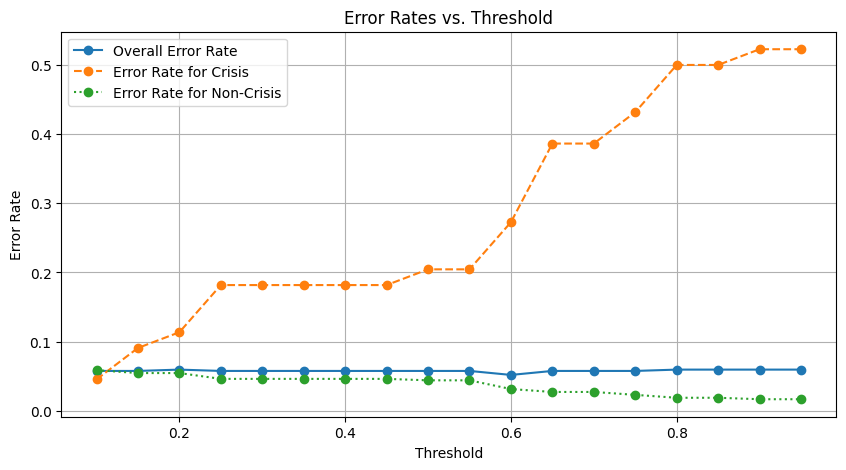

In [160]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np

# Replace 'LogisticRegression()' with your specific model using the best hyperparameters
model = dt  # Assuming 'best_lr' is your model from earlier

# Fit the model to your training data (if not already done)
model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

In [161]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_dt.ravel()

# Define mu and class probabilities
mu = 0.9  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

Loss: 0.018076923076923077
Absolute Usefulness: 0.05807692307692308
Relative Usefulness: 0.7626262626262627


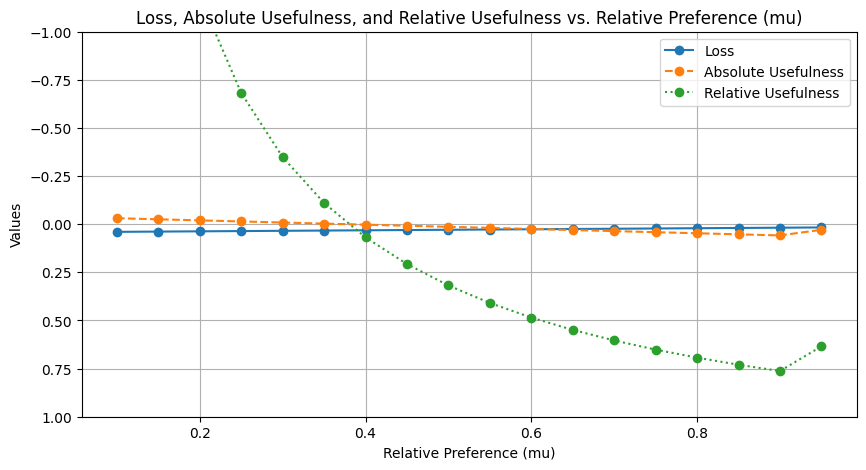

In [162]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix as cm

# Define a range of mu (relative preference) values
mu_values = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store Loss, Absolute Usefulness, and Relative Usefulness
loss_values = []
absolute_usefulness_values = []
relative_usefulness_values = []

for mu in mu_values:
    # Extract values from the confusion matrix
    TN, FP, FN, TP = confusion_matrix_dt.ravel()

    # Define class probabilities
    P1 = (TP + FN) / len(y_test)  # Probability of crises class
    P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

    # Calculate T1 and T2 from the confusion matrix
    T1 = FN / (TP + FN)  # Type I errors (missed crises)
    T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

    # Compute the loss function
    loss = mu * T1 * P1 + (1 - mu) * T2 * P2

    # Compute the absolute usefulness
    min_loss = min(mu * P1, (1 - mu) * P2)
    absolute_usefulness = min_loss - loss

    # Compute the relative usefulness
    max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
    relative_usefulness = absolute_usefulness / max_possible_usefulness

    # Append values to the lists
    loss_values.append(loss)
    absolute_usefulness_values.append(absolute_usefulness)
    relative_usefulness_values.append(relative_usefulness)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(mu_values, loss_values, label='Loss', marker='o', linestyle='-')
plt.plot(mu_values, absolute_usefulness_values, label='Absolute Usefulness', marker='o', linestyle='--')
plt.plot(mu_values, relative_usefulness_values, label='Relative Usefulness', marker='o', linestyle=':')
plt.xlabel('Relative Preference (mu)')
plt.ylabel('Values')
plt.title('Loss, Absolute Usefulness, and Relative Usefulness vs. Relative Preference (mu)')
plt.ylim(1, -1)  # Set the y-axis limits to range from 1 to -1
plt.grid(True)
plt.legend()
plt.show()

### RANDOM FOREST

In [174]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='recall')

# Fit the model to your data (replace X_train and y_train with your data)
rf_grid.fit(X_train, y_train)

# Get the best hyperparameters and score
best_rf_params = rf_grid.best_params_
best_rf_score = rf_grid.best_score_

print("Best hyperparameters for Random Forest:", best_rf_params)
print("Best recall score for Random Forest:", best_rf_score)


Best hyperparameters for Random Forest: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best recall score for Random Forest: 0.19894894894894896
CPU times: user 15min 23s, sys: 2.26 s, total: 15min 26s
Wall time: 15min 40s


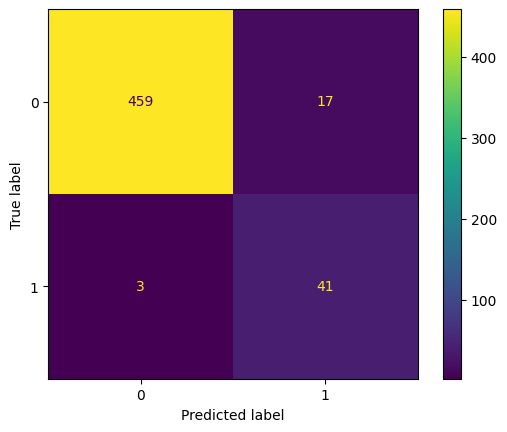

In [180]:
rf = RandomForestClassifier(criterion= 'entropy', max_depth= 20, min_samples_leaf=1, min_samples_split=2, n_estimators=200, random_state=33)
rf.fit(X_train, y_train)

threshold = 0.2
y_probs_rf = rf.predict_proba(X_test)[:, 1]
y_pred_rf = np.where(y_probs_rf >= threshold, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [181]:
recall_score(y_test, y_pred_rf)

0.9318181818181818

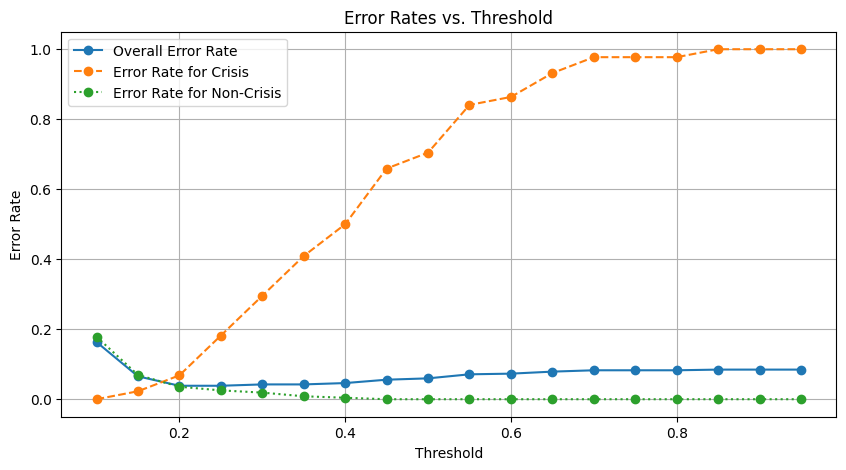

In [182]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np

# Replace 'LogisticRegression()' with your specific model using the best hyperparameters
model = rf  # Assuming 'best_lr' is your model from earlier

# Fit the model to your training data (if not already done)
model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

In [183]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_rf.ravel()

# Define mu and class probabilities
mu = 0.9  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

Loss: 0.008461538461538461
Absolute Usefulness: 0.06769230769230769
Relative Usefulness: 0.8888888888888888


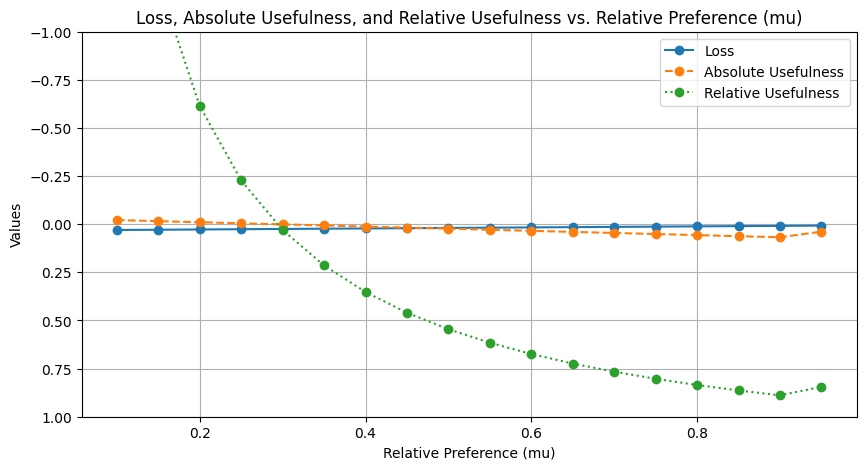

In [184]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix as cm

# Define a range of mu (relative preference) values
mu_values = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store Loss, Absolute Usefulness, and Relative Usefulness
loss_values = []
absolute_usefulness_values = []
relative_usefulness_values = []

for mu in mu_values:
    # Extract values from the confusion matrix
    TN, FP, FN, TP = confusion_matrix_rf.ravel()

    # Define class probabilities
    P1 = (TP + FN) / len(y_test)  # Probability of crises class
    P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

    # Calculate T1 and T2 from the confusion matrix
    T1 = FN / (TP + FN)  # Type I errors (missed crises)
    T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

    # Compute the loss function
    loss = mu * T1 * P1 + (1 - mu) * T2 * P2

    # Compute the absolute usefulness
    min_loss = min(mu * P1, (1 - mu) * P2)
    absolute_usefulness = min_loss - loss

    # Compute the relative usefulness
    max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
    relative_usefulness = absolute_usefulness / max_possible_usefulness

    # Append values to the lists
    loss_values.append(loss)
    absolute_usefulness_values.append(absolute_usefulness)
    relative_usefulness_values.append(relative_usefulness)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(mu_values, loss_values, label='Loss', marker='o', linestyle='-')
plt.plot(mu_values, absolute_usefulness_values, label='Absolute Usefulness', marker='o', linestyle='--')
plt.plot(mu_values, relative_usefulness_values, label='Relative Usefulness', marker='o', linestyle=':')
plt.xlabel('Relative Preference (mu)')
plt.ylabel('Values')
plt.title('Loss, Absolute Usefulness, and Relative Usefulness vs. Relative Preference (mu)')
plt.ylim(1, -1)  # Set the y-axis limits to range from 1 to -1
plt.grid(True)
plt.legend()
plt.show()

## Now we apply PCA(Principal Component Analysis with LR, KNN, SVM, DT, RF) and then to use how these models will perform with PCA.

In [38]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline


# Assuming X_train and y_train are your training data
# Replace X_train and y_train with your actual data

# Function to apply PCA and grid search for each model
def apply_pca_and_grid_search(model, param_grid, model_name):
    # Create a PCA model
    pca = PCA()

    # Create a pipeline with PCA and the model
    pipeline = Pipeline([('pca', pca), ('model', model)])

    # Define a grid of hyperparameters to search
    param_grid_pca = {
        'pca__n_components': [5, 10, 15],  # Adjust the number of components as needed
        **param_grid
    }

    # Create a GridSearchCV object for the PCA + Model pipeline
    grid = GridSearchCV(pipeline, param_grid_pca, cv=5, scoring='recall', n_jobs=-1)

    # Fit the model to your data
    grid.fit(X_train, y_train)

    # Get the best hyperparameters and score
    best_params = grid.best_params_
    best_score = grid.best_score_

    print(f"Best hyperparameters for {model_name} with PCA:", best_params)
    print(f"Best recall score for {model_name} with PCA:", best_score)

In [43]:
# Apply PCA and grid search for Logistic Regression
logistic_regression = LogisticRegression()
param_grid_logistic_regression = {
    'model__penalty': ['l1', 'l2'],
    'model__C': [0.1, 1, 10]
}
apply_pca_and_grid_search(logistic_regression, param_grid_logistic_regression, 'Logistic Regression')


Best hyperparameters for Logistic Regression with PCA: {'model__C': 10, 'model__penalty': 'l2', 'pca__n_components': 15}
Best recall score for Logistic Regression with PCA: 0.01111111111111111


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
 

In [39]:
# Apply PCA and grid search for KNN
knn = KNeighborsClassifier()
param_grid_knn = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__p': [1, 2]
}
apply_pca_and_grid_search(knn, param_grid_knn, 'KNN')

Best hyperparameters for KNN with PCA: {'model__n_neighbors': 3, 'model__p': 1, 'model__weights': 'distance', 'pca__n_components': 15}
Best recall score for KNN with PCA: 0.3810810810810811


In [ ]:
# Apply PCA and grid search for SVM
svm = SVC()
param_grid_svm = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__gamma': ['scale', 'auto'] + [0.001, 0.01, 0.1, 1]
}
apply_pca_and_grid_search(svm, param_grid_svm, 'SVM')



In [41]:
# Apply PCA and grid search for Decision Tree
dt = DecisionTreeClassifier()
param_grid_dt = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}
apply_pca_and_grid_search(dt, param_grid_dt, 'Decision Tree')



Best hyperparameters for Decision Tree with PCA: {'model__criterion': 'gini', 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'pca__n_components': 15}
Best recall score for Decision Tree with PCA: 0.44189189189189193


In [ ]:
# Apply PCA and grid search for Random Forest
rf = RandomForestClassifier()
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}
apply_pca_and_grid_search(rf, param_grid_rf, 'Random Forest')



## Now we add completely external dataset that belongs to Spain, same variables but data completely is different and without any training we have tried to use models that previously trained with first dataset

In [ ]:
real = df = pd.read_excel("Spain Data.xlsx")

In [ ]:
real

In [ ]:
real.ffill(inplace=True)
real.bfill(inplace=True)
real

In [ ]:
real.describe()

In [ ]:
real.isna().sum()

In [ ]:
columns_to_normalize = real.columns[2:]

# Create a subset of the DataFrame with the selected columns
real_subset = real[columns_to_normalize]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the scaler on the selected columns
df_normalized = pd.DataFrame(scaler.fit_transform(real_subset), columns=columns_to_normalize)

# Concatenate the non-normalized columns from the original DataFrame
norm_real = pd.concat([real.iloc[:, :2], df_normalized], axis=1)

norm_real

In [ ]:
norm_real['Date'] = pd.to_datetime(norm_real['Date'])
norm_real.set_index('Date', inplace=True)

In [ ]:
X_test_real = norm_real.drop('Dependent Variable', axis=1)
y_test_real = norm_real['Dependent Variable']

### LOGISTIC REGRESSION (SPAIN)

In [ ]:
lr_real = LogisticRegression(random_state=107).fit(X_train, y_train)

In [ ]:
threshold = 0.2
y_probs_lr_real = lr_real.predict_proba(X_test_real)[:, 1]
y_pred_lr_real = np.where(y_probs_lr_real >= threshold, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_lr_real = confusion_matrix(y_test_real, y_pred_lr_real)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lr_real, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [ ]:
accuracy_score(y_test_real, y_pred_lr_real)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np

# Replace 'LogisticRegression()' with your specific model using the best hyperparameters
model = lr_real  # Assuming 'best_lr' is your model from earlier

# Fit the model to your training data (if not already done)
model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test_real)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test_real, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test_real, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_lr_real.ravel()

# Define mu and class probabilities
mu = 0.9  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix as cm

# Define a range of mu (relative preference) values
mu_values = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store Loss, Absolute Usefulness, and Relative Usefulness
loss_values = []
absolute_usefulness_values = []
relative_usefulness_values = []

for mu in mu_values:
    # Extract values from the confusion matrix
    TN, FP, FN, TP = confusion_matrix_lr_real.ravel()

    # Define class probabilities
    P1 = (TP + FN) / len(y_test)  # Probability of crises class
    P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

    # Calculate T1 and T2 from the confusion matrix
    T1 = FN / (TP + FN)  # Type I errors (missed crises)
    T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

    # Compute the loss function
    loss = mu * T1 * P1 + (1 - mu) * T2 * P2

    # Compute the absolute usefulness
    min_loss = min(mu * P1, (1 - mu) * P2)
    absolute_usefulness = min_loss - loss

    # Compute the relative usefulness
    max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
    relative_usefulness = absolute_usefulness / max_possible_usefulness

    # Append values to the lists
    loss_values.append(loss)
    absolute_usefulness_values.append(absolute_usefulness)
    relative_usefulness_values.append(relative_usefulness)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(mu_values, loss_values, label='Loss', marker='o', linestyle='-')
plt.plot(mu_values, absolute_usefulness_values, label='Absolute Usefulness', marker='o', linestyle='--')
plt.plot(mu_values, relative_usefulness_values, label='Relative Usefulness', marker='o', linestyle=':')
plt.xlabel('Relative Preference (mu)')
plt.ylabel('Values')
plt.title('Loss, Absolute Usefulness, and Relative Usefulness vs. Relative Preference (mu)')
plt.ylim(1, -1)  # Set the y-axis limits to range from 1 to -1
plt.grid(True)
plt.legend()
plt.show()

### LASSO (SPAIN)

In [ ]:
lasso_real = LogisticRegression(C=0.001, penalty='l1', solver='saga', max_iter=1000, random_state=107)
lasso_real.fit(X_train, y_train)

In [ ]:
# Is the number of observations correct? Check

threshold = 0.2
y_probs_lasso_real = lasso_real.predict_proba(X_test_real)[:, 1]
y_pred_lasso_real = np.where(y_probs_lasso_real >= threshold, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_lasso_real = confusion_matrix(y_test_real, y_pred_lasso_real)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lasso_real, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [ ]:
accuracy_score(y_test_real, y_pred_lasso_real)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np

# Replace 'LogisticRegression()' with your specific model using the best hyperparameters
model = lasso_real  # Assuming 'best_lr' is your model from earlier

# Fit the model to your training data (if not already done)
model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test_real)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test_real, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test_real, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_lasso_real.ravel()

# Define mu and class probabilities
mu = 0.6  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix as cm

# Define a range of mu (relative preference) values
mu_values = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store Loss, Absolute Usefulness, and Relative Usefulness
loss_values = []
absolute_usefulness_values = []
relative_usefulness_values = []

for mu in mu_values:
    # Extract values from the confusion matrix
    TN, FP, FN, TP = confusion_matrix_lasso_real.ravel()

    # Define class probabilities
    P1 = (TP + FN) / len(y_test)  # Probability of crises class
    P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

    # Calculate T1 and T2 from the confusion matrix
    T1 = FN / (TP + FN)  # Type I errors (missed crises)
    T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

    # Compute the loss function
    loss = mu * T1 * P1 + (1 - mu) * T2 * P2

    # Compute the absolute usefulness
    min_loss = min(mu * P1, (1 - mu) * P2)
    absolute_usefulness = min_loss - loss

    # Compute the relative usefulness
    max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
    relative_usefulness = absolute_usefulness / max_possible_usefulness

    # Append values to the lists
    loss_values.append(loss)
    absolute_usefulness_values.append(absolute_usefulness)
    relative_usefulness_values.append(relative_usefulness)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(mu_values, loss_values, label='Loss', marker='o', linestyle='-')
plt.plot(mu_values, absolute_usefulness_values, label='Absolute Usefulness', marker='o', linestyle='--')
plt.plot(mu_values, relative_usefulness_values, label='Relative Usefulness', marker='o', linestyle=':')
plt.xlabel('Relative Preference (mu)')
plt.ylabel('Values')
plt.title('Loss, Absolute Usefulness, and Relative Usefulness vs. Relative Preference (mu)')
plt.ylim(1, -1)  # Set the y-axis limits to range from 1 to -1
plt.grid(True)
plt.legend()
plt.show()

### KNN (SPAIN)

In [ ]:
knn_real = KNeighborsClassifier(n_neighbors= 3, p= 1, weights='distance')
knn_real.fit(X_train, y_train)

In [ ]:
threshold = 0.4
y_probs_knn_real = knn_real.predict_proba(X_test_real)[:, 1]
y_pred_knn_real = np.where(y_probs_knn_real >= threshold, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_knn_real = confusion_matrix(y_test_real, y_pred_knn_real)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_knn_real, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [ ]:
accuracy_score(y_test_real, y_pred_knn_real)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np

# Replace 'LogisticRegression()' with your specific model using the best hyperparameters
model = knn_real  # Assuming 'best_lr' is your model from earlier

# Fit the model to your training data (if not already done)
model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test_real)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test_real, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test_real, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_knn_real.ravel()

# Define mu and class probabilities
mu = 0.9  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix as cm

# Define a range of mu (relative preference) values
mu_values = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store Loss, Absolute Usefulness, and Relative Usefulness
loss_values = []
absolute_usefulness_values = []
relative_usefulness_values = []

for mu in mu_values:
    # Extract values from the confusion matrix
    TN, FP, FN, TP = confusion_matrix_knn_real.ravel()

    # Define class probabilities
    P1 = (TP + FN) / len(y_test)  # Probability of crises class
    P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

    # Calculate T1 and T2 from the confusion matrix
    T1 = FN / (TP + FN)  # Type I errors (missed crises)
    T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

    # Compute the loss function
    loss = mu * T1 * P1 + (1 - mu) * T2 * P2

    # Compute the absolute usefulness
    min_loss = min(mu * P1, (1 - mu) * P2)
    absolute_usefulness = min_loss - loss

    # Compute the relative usefulness
    max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
    relative_usefulness = absolute_usefulness / max_possible_usefulness

    # Append values to the lists
    loss_values.append(loss)
    absolute_usefulness_values.append(absolute_usefulness)
    relative_usefulness_values.append(relative_usefulness)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(mu_values, loss_values, label='Loss', marker='o', linestyle='-')
plt.plot(mu_values, absolute_usefulness_values, label='Absolute Usefulness', marker='o', linestyle='--')
plt.plot(mu_values, relative_usefulness_values, label='Relative Usefulness', marker='o', linestyle=':')
plt.xlabel('Relative Preference (mu)')
plt.ylabel('Values')
plt.title('Loss, Absolute Usefulness, and Relative Usefulness vs. Relative Preference (mu)')
plt.ylim(1, -1)  # Set the y-axis limits to range from 1 to -1
plt.grid(True)
plt.legend()
plt.show()

### SVM (SPAIN)

In [ ]:
svm_real = SVC(C=10, gamma=1, kernel='rbf', probability=True, random_state=159)
svm_real.fit(X_train, y_train)

In [ ]:
threshold = 0.1

y_probs_svm_real = svm.predict_proba(X_test_real)[:, 1]
y_pred_svm_real = np.where(y_probs_svm_real >= threshold, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_svm_real = confusion_matrix(y_test_real, y_pred_svm_real)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_svm_real, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [ ]:
accuracy_score(y_test_real, y_pred_svm_real)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np

# Replace 'LogisticRegression()' with your specific model using the best hyperparameters
model = svm_real  # Assuming 'best_lr' is your model from earlier

# Fit the model to your training data (if not already done)
model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test_real)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test_real, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test_real, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_svm_real.ravel()

# Define mu and class probabilities
mu = 0.6  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix as cm

# Define a range of mu (relative preference) values
mu_values = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store Loss, Absolute Usefulness, and Relative Usefulness
loss_values = []
absolute_usefulness_values = []
relative_usefulness_values = []

for mu in mu_values:
    # Extract values from the confusion matrix
    TN, FP, FN, TP = confusion_matrix_svm_real.ravel()

    # Define class probabilities
    P1 = (TP + FN) / len(y_test)  # Probability of crises class
    P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

    # Calculate T1 and T2 from the confusion matrix
    T1 = FN / (TP + FN)  # Type I errors (missed crises)
    T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

    # Compute the loss function
    loss = mu * T1 * P1 + (1 - mu) * T2 * P2

    # Compute the absolute usefulness
    min_loss = min(mu * P1, (1 - mu) * P2)
    absolute_usefulness = min_loss - loss

    # Compute the relative usefulness
    max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
    relative_usefulness = absolute_usefulness / max_possible_usefulness

    # Append values to the lists
    loss_values.append(loss)
    absolute_usefulness_values.append(absolute_usefulness)
    relative_usefulness_values.append(relative_usefulness)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(mu_values, loss_values, label='Loss', marker='o', linestyle='-')
plt.plot(mu_values, absolute_usefulness_values, label='Absolute Usefulness', marker='o', linestyle='--')
plt.plot(mu_values, relative_usefulness_values, label='Relative Usefulness', marker='o', linestyle=':')
plt.xlabel('Relative Preference (mu)')
plt.ylabel('Values')
plt.title('Loss, Absolute Usefulness, and Relative Usefulness vs. Relative Preference (mu)')
plt.ylim(1, -1)  # Set the y-axis limits to range from 1 to -1
plt.grid(True)
plt.legend()
plt.show()

### DECISION TREE (SPAIN)

In [ ]:
dt_real = DecisionTreeClassifier(criterion= 'gini', max_depth= 20, min_samples_leaf=1,
                            min_samples_split=2, random_state=20)
dt_real.fit(X_train, y_train)

In [ ]:
threshold = 0.2
y_probs_dt_real = dt_real.predict_proba(X_test_real)[:, 1]
y_pred_dt_real = np.where(y_probs_dt_real >= threshold, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_dt_real = confusion_matrix(y_test_real, y_pred_dt_real)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt_real, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [ ]:
accuracy_score(y_test_real, y_pred_dt_real)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np

# Replace 'LogisticRegression()' with your specific model using the best hyperparameters
model = dt_real  # Assuming 'best_lr' is your model from earlier

# Fit the model to your training data (if not already done)
model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test_real)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test_real, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test_real, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_dt_real.ravel()

# Define mu and class probabilities
mu = 0.6  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix as cm

# Define a range of mu (relative preference) values
mu_values = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store Loss, Absolute Usefulness, and Relative Usefulness
loss_values = []
absolute_usefulness_values = []
relative_usefulness_values = []

for mu in mu_values:
    # Extract values from the confusion matrix
    TN, FP, FN, TP = confusion_matrix_dt_real.ravel()

    # Define class probabilities
    P1 = (TP + FN) / len(y_test)  # Probability of crises class
    P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

    # Calculate T1 and T2 from the confusion matrix
    T1 = FN / (TP + FN)  # Type I errors (missed crises)
    T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

    # Compute the loss function
    loss = mu * T1 * P1 + (1 - mu) * T2 * P2

    # Compute the absolute usefulness
    min_loss = min(mu * P1, (1 - mu) * P2)
    absolute_usefulness = min_loss - loss

    # Compute the relative usefulness
    max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
    relative_usefulness = absolute_usefulness / max_possible_usefulness

    # Append values to the lists
    loss_values.append(loss)
    absolute_usefulness_values.append(absolute_usefulness)
    relative_usefulness_values.append(relative_usefulness)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(mu_values, loss_values, label='Loss', marker='o', linestyle='-')
plt.plot(mu_values, absolute_usefulness_values, label='Absolute Usefulness', marker='o', linestyle='--')
plt.plot(mu_values, relative_usefulness_values, label='Relative Usefulness', marker='o', linestyle=':')
plt.xlabel('Relative Preference (mu)')
plt.ylabel('Values')
plt.title('Loss, Absolute Usefulness, and Relative Usefulness vs. Relative Preference (mu)')
plt.ylim(1, -1)  # Set the y-axis limits to range from 1 to -1
plt.grid(True)
plt.legend()
plt.show()

### RANDOM FOREST (SPAIN)

In [ ]:
rf_real = RandomForestClassifier(criterion= 'entropy',
                                 max_depth= 20, min_samples_leaf=1,
                                 min_samples_split=2,
                                 n_estimators=100, random_state=123)
rf_real.fit(X_train, y_train)

In [ ]:
threshold = 0.1

y_probs_rf_real = rf_real.predict_proba(X_test_real)[:, 1]
y_pred_rf_real = np.where(y_probs_rf_real >= threshold, 1, 0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix_rf_real = confusion_matrix(y_test_real, y_pred_rf_real)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf_real, display_labels=[0, 1])
cm_display.plot()
plt.show()

In [ ]:
accuracy_score(y_test_real, y_pred_rf_real)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix as cm
import matplotlib.pyplot as plt
import numpy as np

# Replace 'LogisticRegression()' with your specific model using the best hyperparameters
model = rf_real  # Assuming 'best_lr' is your model from earlier

# Fit the model to your training data (if not already done)
model.fit(X_train, y_train)

# Get predicted probabilities for class 1
predicted_probabilities = model.predict_proba(X_test_real)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store error rates
overall_error_rates = []
default_error_rates = []
non_default_error_rates = []

# Calculate error rates for each threshold
for threshold in thresholds:
    # Assign labels based on the threshold
    predicted_labels = (predicted_probabilities >= threshold).astype(int)

    # Calculate the confusion matrix
    confusion = cm(y_test_real, predicted_labels)

    # Calculate error rates
    overall_error_rate = 1 - accuracy_score(y_test_real, predicted_labels)
    default_error_rate = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])  # False negatives among defaulting customers
    non_default_error_rate = confusion[0, 1] / (confusion[0, 0] + confusion[0, 1])  # False positives among non-defaulting customers

    # Append error rates to the lists
    overall_error_rates.append(overall_error_rate)
    default_error_rates.append(default_error_rate)
    non_default_error_rates.append(non_default_error_rate)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(thresholds, overall_error_rates, label='Overall Error Rate', marker='o', linestyle='-')
plt.plot(thresholds, default_error_rates, label='Error Rate for Crisis', marker='o', linestyle='--')
plt.plot(thresholds, non_default_error_rates, label='Error Rate for Non-Crisis', marker='o', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.title('Error Rates vs. Threshold')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Extract values from the confusion matrix
TN, FP, FN, TP = confusion_matrix_rf_real.ravel()

# Define mu and class probabilities
mu = 0.9  # Relative preference between missing crises and false alarms
P1 = (TP + FN) / len(y_test)  # Probability of crises class
P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

# Calculate T1 and T2 from the confusion matrix
T1 = FN / (TP + FN)  # Type I errors (missed crises)
T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

# Compute the loss function
loss = mu * T1 * P1 + (1 - mu) * T2 * P2

# Compute the absolute usefulness
min_loss = min(mu * P1, (1 - mu) * P2)
absolute_usefulness = min_loss - loss

# Compute the relative usefulness
max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
relative_usefulness = absolute_usefulness / max_possible_usefulness

print(f"Loss: {loss}")
print(f"Absolute Usefulness: {absolute_usefulness}")
print(f"Relative Usefulness: {relative_usefulness}")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix as cm

# Define a range of mu (relative preference) values
mu_values = np.arange(0.1, 1.0, 0.05)

# Initialize lists to store Loss, Absolute Usefulness, and Relative Usefulness
loss_values = []
absolute_usefulness_values = []
relative_usefulness_values = []

for mu in mu_values:
    # Extract values from the confusion matrix
    TN, FP, FN, TP = confusion_matrix_rf_real.ravel()

    # Define class probabilities
    P1 = (TP + FN) / len(y_test)  # Probability of crises class
    P2 = (TN + FP) / len(y_test)  # Probability of tranquil class

    # Calculate T1 and T2 from the confusion matrix
    T1 = FN / (TP + FN)  # Type I errors (missed crises)
    T2 = FP / (TN + FP)  # Type II errors (issued false alarms)

    # Compute the loss function
    loss = mu * T1 * P1 + (1 - mu) * T2 * P2

    # Compute the absolute usefulness
    min_loss = min(mu * P1, (1 - mu) * P2)
    absolute_usefulness = min_loss - loss

    # Compute the relative usefulness
    max_possible_usefulness = min(mu * P1, (1 - mu) * P2)
    relative_usefulness = absolute_usefulness / max_possible_usefulness

    # Append values to the lists
    loss_values.append(loss)
    absolute_usefulness_values.append(absolute_usefulness)
    relative_usefulness_values.append(relative_usefulness)

# Create the figure
plt.figure(figsize=(10, 5))
plt.plot(mu_values, loss_values, label='Loss', marker='o', linestyle='-')
plt.plot(mu_values, absolute_usefulness_values, label='Absolute Usefulness', marker='o', linestyle='--')
plt.plot(mu_values, relative_usefulness_values, label='Relative Usefulness', marker='o', linestyle=':')
plt.xlabel('Relative Preference (mu)')
plt.ylabel('Values')
plt.title('Loss, Absolute Usefulness, and Relative Usefulness vs. Relative Preference (mu)')
plt.ylim(1, -1)  # Set the y-axis limits to range from 1 to -1
plt.grid(True)
plt.legend()
plt.show()